In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn import metrics
from itertools import combinations
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from matplotlib import pyplot as plt

import time

train_df = pd.read_csv('train.csv', na_values=' ?')

test_df = pd.read_csv('test.csv', na_values=' ?')

train_df.head()

,ID (this is not a feature),age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,1,36,Private,355053,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,28,United-States,<=50K
1,2,30,Self-emp-inc,132601,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
2,3,19,Private,63814,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,18,United-States,<=50K
3,4,44,Private,112507,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
4,5,51,Self-emp-inc,126850,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,65,United-States,<=50K


## Data Cleaning -- For Training data

In [2]:
#Finding the special characters in the data frame 
train_df.isin([' ?']).sum(axis=0)

ID (this is not a feature)    0
age                           0
workclass                     0
fnlwgt                        0
education                     0
education-num                 0
marital-status                0
occupation                    0
relationship                  0
race                          0
sex                           0
capital-gain                  0
capital-loss                  0
hours-per-week                0
native-country                0
salary                        0
dtype: int64

In [3]:
# code will replace the special character to nan and then drop the columns 
train_df['workclass'] = train_df['workclass'].replace(' ?',np.nan)
train_df['occupation'] = train_df['occupation'].replace(' ?',np.nan)
train_df['native-country'] = train_df['native-country'].replace(' ?',np.nan)


#dropping the NaN rows now 
train_df.dropna(inplace=True)

In [4]:
train_df.isin([' ?']).sum(axis=0)

ID (this is not a feature)    0
age                           0
workclass                     0
fnlwgt                        0
education                     0
education-num                 0
marital-status                0
occupation                    0
relationship                  0
race                          0
sex                           0
capital-gain                  0
capital-loss                  0
hours-per-week                0
native-country                0
salary                        0
dtype: int64

## Data Cleaning -- For testing data

In [5]:
# code will replace the special character to nan and then drop the columns 
test_df['workclass'] = test_df['workclass'].replace(' ?',np.nan)
test_df['occupation'] = test_df['occupation'].replace(' ?',np.nan)
test_df['native-country'] = test_df['native-country'].replace(' ?',np.nan)


#dropping the NaN rows now 
test_df.dropna(inplace=True)

In [6]:
test_df.isin([' ?']).sum(axis=0)

ID (this is not a feature)    0
age                           0
workclass                     0
fnlwgt                        0
education                     0
education-num                 0
marital-status                0
occupation                    0
relationship                  0
race                          0
sex                           0
capital-gain                  0
capital-loss                  0
hours-per-week                0
native-country                0
salary                        0
dtype: int64

## Feature Engineering -- For training data

In [7]:
# converting the categorical data to numerical

for c in train_df.columns:
    print (train_df[c].value_counts())

1        1
25911    1
25905    1
25906    1
25907    1
        ..
12986    1
12985    1
12984    1
12983    1
38842    1
Name: ID (this is not a feature), Length: 35976, dtype: int64
31    1017
33    1017
23    1015
36    1007
30     993
      ... 
88       5
85       4
86       1
87       1
89       1
Name: age, Length: 74, dtype: int64
 Private             26489
 Self-emp-not-inc     3022
 Local-gov            2483
 State-gov            1526
 Self-emp-inc         1312
 Federal-gov          1129
 Without-pay            15
Name: workclass, dtype: int64
203488    17
120277    14
99185     14
125892    13
113364    13
          ..
316120     1
160472     1
147314     1
135285     1
210217     1
Name: fnlwgt, Length: 22936, dtype: int64
 HS-grad         11807
 Some-college     7864
 Bachelors        5990
 Masters          2030
 Assoc-voc        1554
 11th             1286
 Assoc-acdm       1198
 10th              986
 7th-8th           640
 Prof-school       620
 9th               533
 12

In [8]:
#removing noisy data based on the unique values
# to standardize the data
train_df.drop(['ID (this is not a feature)', 'education-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace = True)
train_df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,Private,HS-grad,Separated,Other-service,Unmarried,Black,Female,<=50K
1,Self-emp-inc,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,>50K
2,Private,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,<=50K
3,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,<=50K
4,Self-emp-inc,HS-grad,Married-civ-spouse,Transport-moving,Husband,White,Male,<=50K


In [9]:
#mapping the data into numerical data using map function
train_df['salary'] = train_df['salary'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [10]:
#change for every categorical variable

train_df['sex'].unique()

array([' Female', ' Male'], dtype=object)

In [11]:
train_df['workclass'] = train_df['workclass'].map({' Private':0, ' Self-emp-inc':1, ' Local-gov': 2, ' Self-emp-not-inc': 3,
                                                  ' State-gov': 4, ' Federal-gov': 5, ' Without-pay': 6}).astype(int)

train_df['education'] = train_df['education'].map({' HS-grad': 0, ' Bachelors': 1, ' Some-college':2, ' Prof-school': 3, ' 10th':4, 
                                                   ' 12th':5, ' 7th-8th':6, ' Masters':7, ' Assoc-acdm':8, ' Assoc-voc':9, ' 11th':10,
                                                   ' 9th':11, ' 1st-4th':12, ' 5th-6th':13, ' Doctorate':14, ' Preschool':15}).astype(int)

train_df['marital-status'] = train_df['marital-status'].map({' Separated':0, ' Married-civ-spouse':1, ' Never-married':2, 
                                                             ' Divorced':3, ' Widowed':4, ' Married-spouse-absent':5, 
                                                             ' Married-AF-spouse':6}).astype(int)

train_df['occupation'] = train_df['occupation'].map({' Other-service':0, ' Craft-repair':1, ' Adm-clerical':2, ' Sales':3,
                                                     ' Transport-moving':4, ' Farming-fishing':5, ' Tech-support':6,
                                                     ' Prof-specialty':7, ' Exec-managerial':8, ' Machine-op-inspct':9,
                                                     ' Handlers-cleaners':10, ' Armed-Forces':11, ' Priv-house-serv':12,
                                                     ' Protective-serv':13}).astype(int)

train_df['relationship'] = train_df['relationship'].map({' Unmarried':0, ' Husband':1, ' Not-in-family':2, ' Own-child':3,
                                                         ' Wife':4,' Other-relative':5}).astype(int)

In [12]:
train_df['race'] = train_df['race'].map({' Black':0, ' White':1, ' Other':2, ' Asian-Pac-Islander':3,
                                         ' Amer-Indian-Eskimo':4}).astype(int)

train_df['sex'] = train_df['sex'].map({' Female':0, ' Male':1}).astype(int)


In [13]:
train_df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1
2,0,2,2,2,2,1,0,0
3,0,2,1,3,1,1,1,0
4,1,0,1,4,1,1,1,0


In [14]:
feature_names = train_df.columns

## Feature engineering -- testing data

In [15]:
# converting the categorical data to numerical

for c in test_df.columns:
    print (test_df[c].value_counts())

1        1
6581     1
6678     1
6679     1
6680     1
        ..
3341     1
3342     1
3343     1
3344     1
10000    1
Name: ID (this is not a feature), Length: 9246, dtype: int64
35    289
36    276
34    264
33    262
41    257
     ... 
83      3
78      2
82      2
84      1
85      1
Name: age, Length: 70, dtype: int64
 Private             6818
 Self-emp-not-inc     774
 Local-gov            617
 State-gov            420
 Self-emp-inc         334
 Federal-gov          277
 Without-pay            6
Name: workclass, dtype: int64
149102    7
177675    6
132879    6
143062    6
216129    5
         ..
152924    1
178310    1
71221     1
220187    1
203392    1
Name: fnlwgt, Length: 7973, dtype: int64
 HS-grad         2976
 Some-college    2035
 Bachelors       1580
 Masters          484
 Assoc-voc        405
 11th             333
 Assoc-acdm       309
 10th             237
 7th-8th          183
 Prof-school      165
 9th              143
 12th             135
 Doctorate        108
 

In [16]:
#removing noisy data based on the unique values
test_df.drop(['ID (this is not a feature)', 'education-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace = True)
test_df.head()

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,<=50K
1,Self-emp-not-inc,11th,Divorced,Exec-managerial,Not-in-family,White,Male,<=50K
2,Private,Some-college,Married-civ-spouse,Craft-repair,Husband,Black,Male,<=50K
3,Private,HS-grad,Never-married,Transport-moving,Own-child,White,Male,>50K
4,Private,Some-college,Never-married,Machine-op-inspct,Unmarried,White,Male,<=50K


In [17]:
#mapping the data into numerical data using map function
test_df['salary'] = test_df['salary'].map({'<=50K': 0, '>50K': 1}).astype(int)

In [18]:
#change for every categorical variable

test_df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [19]:
test_df['workclass'] = test_df['workclass'].map({' Private':0, ' Self-emp-inc':1, ' Local-gov': 2, ' Self-emp-not-inc': 3,
                                                  ' State-gov': 4, ' Federal-gov': 5, ' Without-pay': 6}).astype(int)

test_df['education'] = test_df['education'].map({' HS-grad': 0, ' Bachelors': 1, ' Some-college':2, ' Prof-school': 3, ' 10th':4, 
                                                   ' 12th':5, ' 7th-8th':6, ' Masters':7, ' Assoc-acdm':8, ' Assoc-voc':9, ' 11th':10,
                                                   ' 9th':11, ' 1st-4th':12, ' 5th-6th':13, ' Doctorate':14, ' Preschool':15}).astype(int)

test_df['marital-status'] = test_df['marital-status'].map({' Separated':0, ' Married-civ-spouse':1, ' Never-married':2, 
                                                             ' Divorced':3, ' Widowed':4, ' Married-spouse-absent':5, 
                                                             ' Married-AF-spouse':6}).astype(int)

test_df['occupation'] = test_df['occupation'].map({' Other-service':0, ' Craft-repair':1, ' Adm-clerical':2, ' Sales':3,
                                                     ' Transport-moving':4, ' Farming-fishing':5, ' Tech-support':6,
                                                     ' Prof-specialty':7, ' Exec-managerial':8, ' Machine-op-inspct':9,
                                                     ' Handlers-cleaners':10, ' Armed-Forces':11, ' Priv-house-serv':12,
                                                     ' Protective-serv':13}).astype(int)

test_df['relationship'] = test_df['relationship'].map({' Unmarried':0, ' Husband':1, ' Not-in-family':2, ' Own-child':3,
                                                         ' Wife':4,' Other-relative':5}).astype(int)

In [20]:
test_df['race'] = test_df['race'].map({' Black':0, ' White':1, ' Other':2, ' Asian-Pac-Islander':3,
                                         ' Amer-Indian-Eskimo':4}).astype(int)

test_df['sex'] = test_df['sex'].map({' Female':0, ' Male':1}).astype(int)

In [21]:
test_df.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,3,0,1,5,1,1,1,0
1,3,10,3,8,2,1,1,0
2,0,2,1,1,1,0,1,0
3,0,0,2,4,3,1,1,1
4,0,2,2,9,0,1,1,0


## Classification Models

In [22]:
x_train = train_df.drop(['salary'], axis=1)
x_test = test_df.drop(['salary'], axis=1)

y_train = pd.DataFrame(train_df['salary'])
y_test = pd.DataFrame(test_df['salary'])

In [23]:
logreg = LogisticRegression()
percep = Perceptron()
dectreeclf = DecisionTreeClassifier()
knnclf = KNeighborsClassifier(n_neighbors=5) 
mlp = MLPClassifier(hidden_layer_sizes=(6, 5),
                    random_state=5,
                    verbose=True,
                    activation = 'relu',
                    solver = 'adam',
                    alpha=0.0001,
                    batch_size=min(200, len(train_df)),
                    learning_rate_init=0.01)
linsvc = SVC(kernel = 'linear')
nonsvc = SVC(kernel = 'rbf')

In [24]:
# Parameteric Grid Search
# from sklearn.model_selection import GridSearchCV

# param_grid = [
#     {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#     'C' : np.logspace(-4, 4, 20),
#     'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'max_iter' : [100, 1000, 2500, 5000]
#     }
# ]

In [25]:
# log_clf = GridSearchCV(reg, param_grid = param_grid, cv = 3, verbose = True, n_jobs = -1)


In [26]:
# train our model using training data
logreg.fit(x_train, y_train)
# predict the salary on test data
y_pred = logreg.predict(x_test)


# For perceptron
percep.fit(x_train, y_train)
y_pred_1 = percep.predict(x_test)


# For decision tree classifier
dectreeclf.fit(x_train, y_train)
y_pred_2 = dectreeclf.predict(x_test)


# KNN for classifier
knnclf.fit(x_train, y_train)
y_pred_3 = knnclf.predict(x_test)


# MLP
mlp.fit(x_train, y_train)
y_pred_4 = mlp.predict(x_test)


# Linear SVC
linsvc.fit(x_train, y_train)
y_pred_5 = linsvc.predict(x_test)


# Non-linear SVC
nonsvc.fit(x_train, y_train)
y_pred_6 = nonsvc.predict(x_test)

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_percept

Iteration 1, loss = 0.48435777
Iteration 2, loss = 0.45934945
Iteration 3, loss = 0.44654267
Iteration 4, loss = 0.44203009
Iteration 5, loss = 0.43460491
Iteration 6, loss = 0.42620607
Iteration 7, loss = 0.42330444
Iteration 8, loss = 0.41995095
Iteration 9, loss = 0.41938583
Iteration 10, loss = 0.41838168
Iteration 11, loss = 0.41740305
Iteration 12, loss = 0.41469058
Iteration 13, loss = 0.41569296
Iteration 14, loss = 0.41400463
Iteration 15, loss = 0.41275461
Iteration 16, loss = 0.41281690
Iteration 17, loss = 0.41298990
Iteration 18, loss = 0.41217493
Iteration 19, loss = 0.41284386
Iteration 20, loss = 0.41200543
Iteration 21, loss = 0.41197736
Iteration 22, loss = 0.41282731
Iteration 23, loss = 0.41075197
Iteration 24, loss = 0.41145982
Iteration 25, loss = 0.41169003
Iteration 26, loss = 0.41159859
Iteration 27, loss = 0.41092165
Iteration 28, loss = 0.41045724
Iteration 29, loss = 0.41133145
Iteration 30, loss = 0.40943422
Iteration 31, loss = 0.40967992
Iteration 32, los

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
logreg.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [28]:
percep.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


array([0])

In [29]:
dectreeclf.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [30]:
knnclf.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [31]:
mlp.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0])

In [32]:
# Linear SVC
linsvc.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [33]:
# Non-linear SVC
nonsvc.predict([[0,0,2,4,3,1,1]])

C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [34]:
# Logistic Regression
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7407527579493836


In [35]:
# Perceptron
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_1))

Accuracy: 0.7336145360155742


In [36]:
# Decision Tree Classifier
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_2))

Accuracy: 0.818191650443435


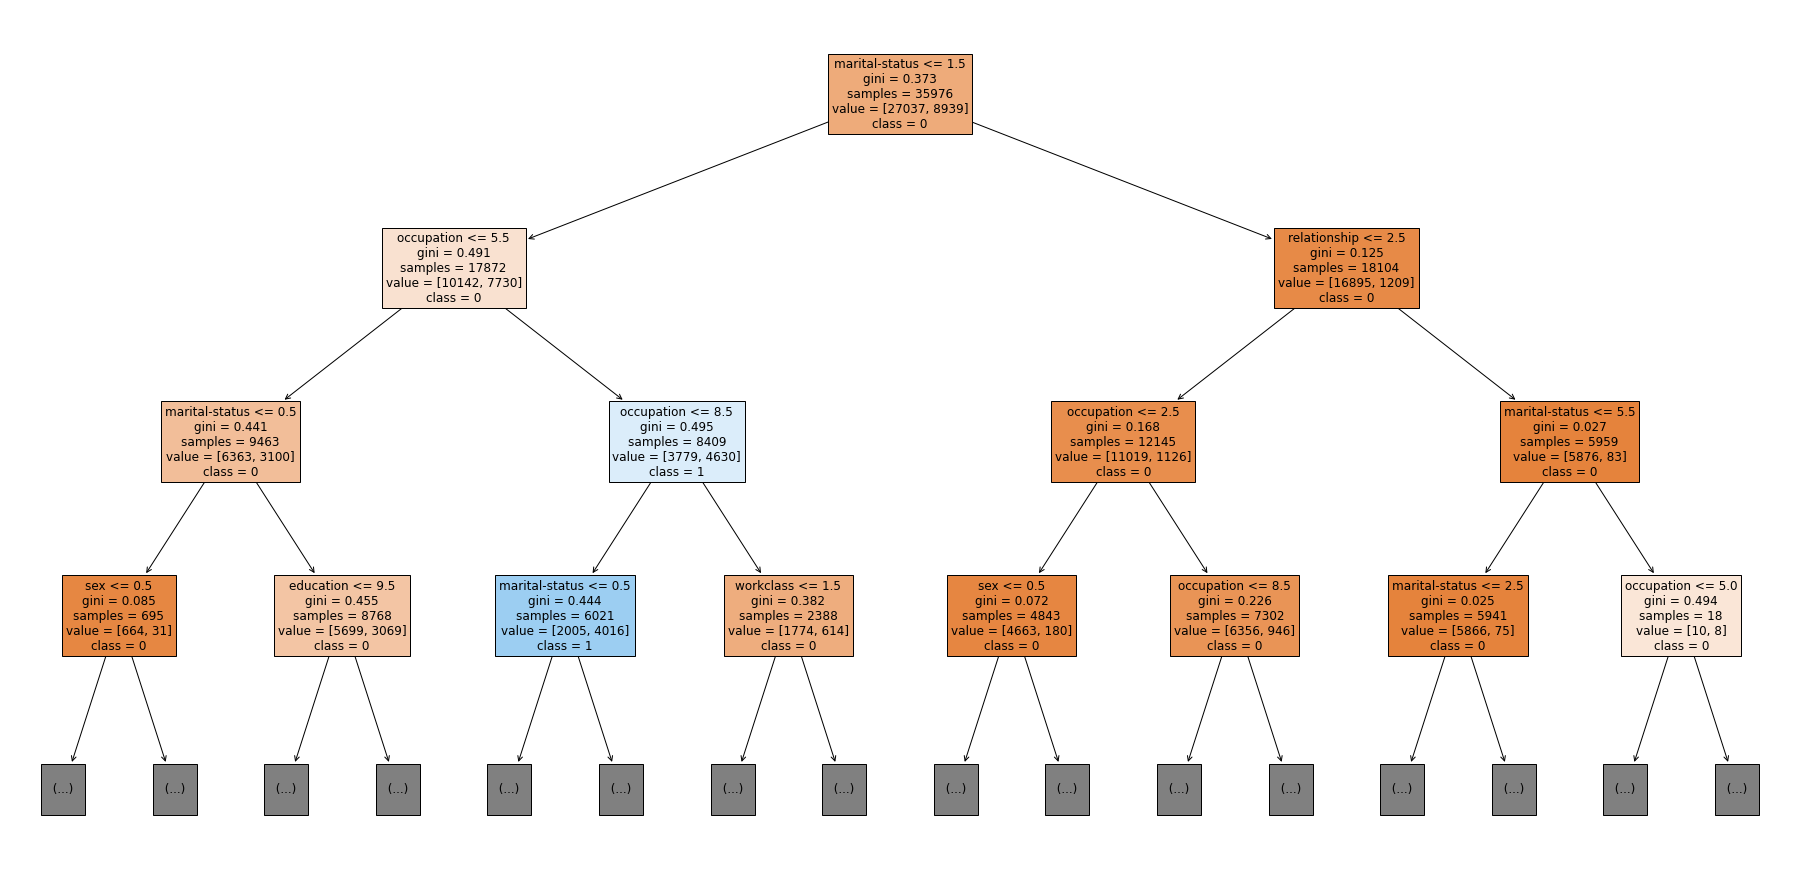

In [37]:
class_names = list(map(str, dectreeclf.classes_))

plt.figure(figsize=(32, 16))

tree.plot_tree(
    decision_tree=dectreeclf, 
    max_depth=3, 
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    fontsize=12,
)

plt.show()

In [38]:
# KNN
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))

Accuracy: 0.799480856586632


In [39]:
# MLP without PCA
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))

Accuracy: 0.8119186675319057


In [40]:
x_train.columns[1]

'education'

In [41]:
# Linear SVC
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_5))

Accuracy: 0.754596582305862


In [42]:
 # Non-linear SVC
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_6))

Accuracy: 0.8011031797534068


## Regression Models

In [43]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train_df['salary'] = le.fit_transform(train_df['salary'])
train_df['workclass'] = le.fit_transform(train_df['workclass'])
train_df['education'] = le.fit_transform(train_df['education'])
train_df['marital-status'] = le.fit_transform(train_df['marital-status'])
train_df['occupation'] = le.fit_transform(train_df['occupation'])
train_df['relationship'] = le.fit_transform(train_df['relationship'])
train_df['race'] = le.fit_transform(train_df['race'])
train_df['sex'] = le.fit_transform(train_df['sex'])

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

test_df['salary']=le.fit_transform(test_df['salary'])
test_df['workclass']=le.fit_transform(test_df['workclass'])
test_df['education']=le.fit_transform(test_df['education'])
test_df['marital-status']=le.fit_transform(test_df['marital-status'])
test_df['occupation']=le.fit_transform(test_df['occupation'])
test_df['relationship']=le.fit_transform(test_df['relationship'])
test_df['race']=le.fit_transform(test_df['race'])
test_df['sex']=le.fit_transform(test_df['sex'])

In [45]:
test_df

,workclass,education,marital-status,occupation,relationship,race,sex,salary
0,3,0,1,5,1,1,1,0
1,3,10,3,8,2,1,1,0
2,0,2,1,1,1,0,1,0
3,0,0,2,4,3,1,1,1
4,0,2,2,9,0,1,1,0
...,...,...,...,...,...,...,...,...
9995,0,1,1,7,1,1,1,1
9996,0,10,2,2,3,1,0,0
9997,0,0,0,8,0,1,0,0
9998,0,2,1,7,1,0,1,1


In [46]:
x_train = train_df.drop(['salary'], axis=1)
x_test = test_df.drop(['salary'], axis=1)

scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

y_train = pd.DataFrame(train_df['salary'])
y_test = pd.DataFrame(test_df['salary'])

In [47]:
dectreereg = DecisionTreeRegressor()
knnreg = KNeighborsRegressor(n_neighbors=3)

In [48]:
# For decision tree regressor
dectreereg.fit(x_train, y_train)
y_pred_22 = dectreereg.predict(x_test)

# KNN for regression
knnreg.fit(x_train, y_train)
y_pred_33 = knnreg.predict(x_test)

In [49]:
# Decision Tree Regressor
# Calculating root mean squared error of our predictions
mse = metrics.mean_squared_error(y_test, y_pred_22)
rmse = sqrt(mse)
print(round(rmse,2))

0.37


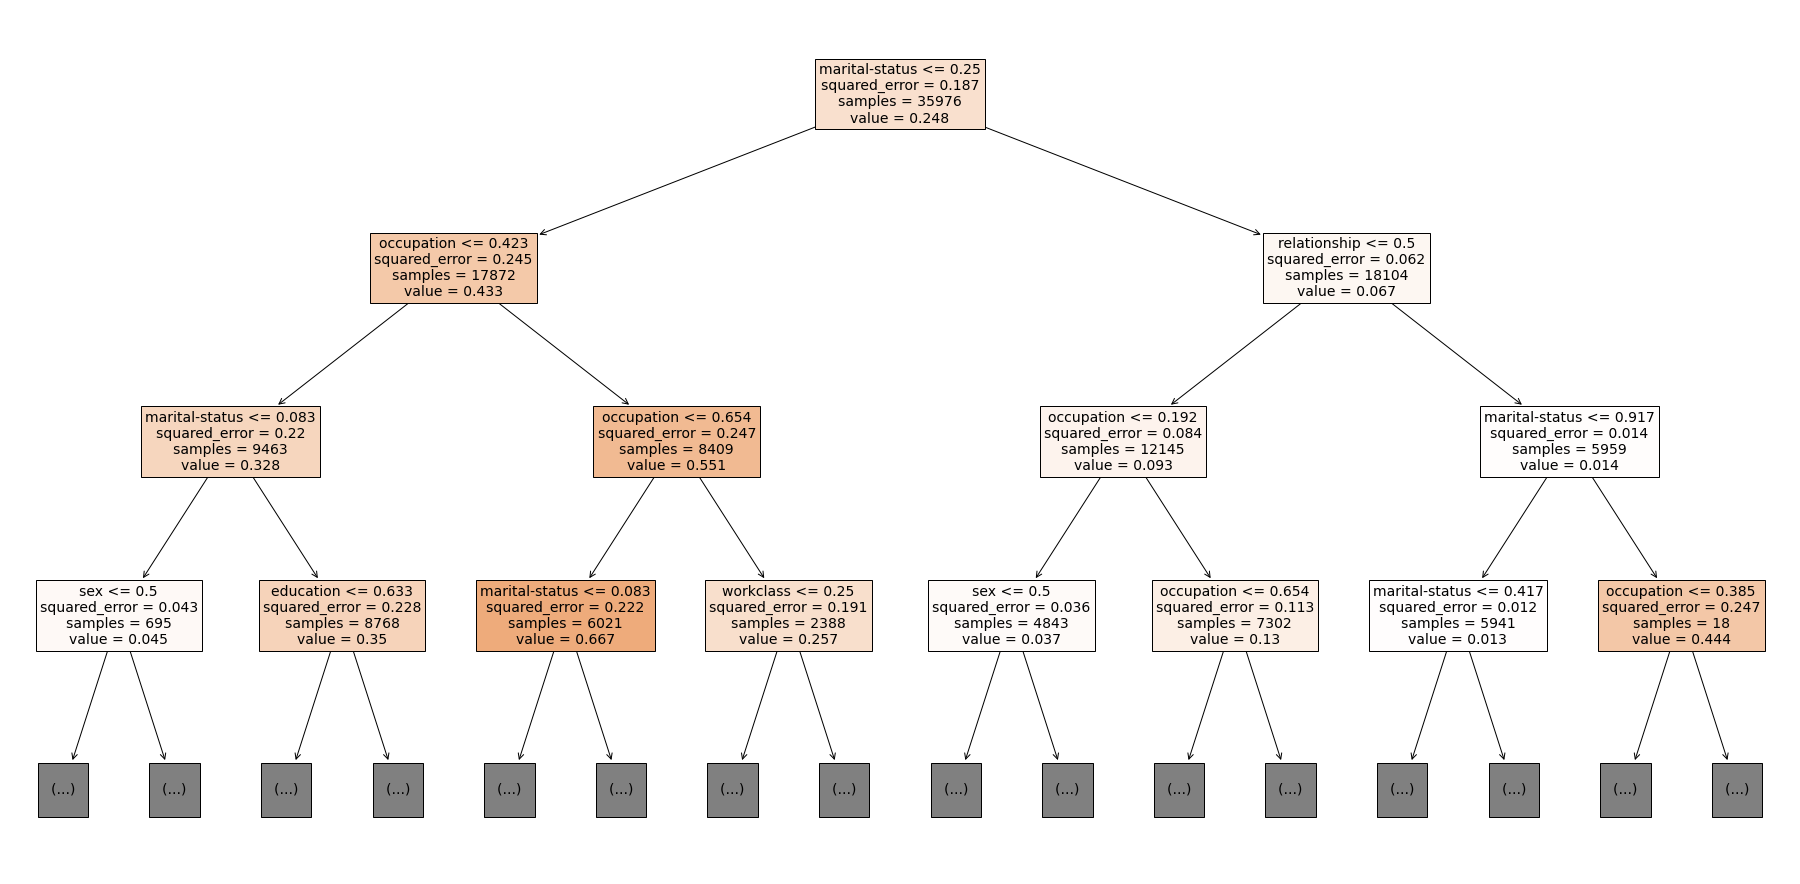

In [50]:
plt.figure(figsize=(32, 16))

tree.plot_tree(
    decision_tree=dectreereg, 
    max_depth=3, 
    feature_names=feature_names, 
    filled=True, 
    fontsize=14
)

plt.show()

In [51]:
# KNN Regressor
#root mean squared error of our predictions
mse = metrics.mean_squared_error(y_test, y_pred_33)
rmse = sqrt(mse)
print(round(rmse,2))

0.4


## MLP classification model (with PCA)

In [52]:
# Computing Eigenvectors and Eigenvalues: Covariance matrix
print('Covariance matrix: \n%s' % np.cov(x_train.T))

cov_matrix = np.cov(x_train.T)

Covariance matrix: 
[[ 5.48867863e-02  1.15704419e-03 -1.37351992e-03  4.02045196e-03
  -3.97990074e-03  1.89275381e-04  4.44934412e-03]
 [ 1.15704419e-03  5.83400068e-02 -1.13023779e-04  3.60295433e-03
  -5.73076216e-04  8.24098108e-04  1.07470345e-03]
 [-1.37351992e-03 -1.13023779e-04  2.43759598e-02 -2.67390389e-03
   4.46790322e-03 -2.34780713e-04 -2.62679317e-02]
 [ 4.02045196e-03  3.60295433e-03 -2.67390389e-03  7.04903414e-02
  -2.77704287e-03  4.46413531e-04  1.33830734e-02]
 [-3.97990074e-03 -5.73076216e-04  4.46790322e-03 -2.77704287e-03
   5.39209017e-02  8.84672092e-04 -2.68175361e-02]
 [ 1.89275381e-04  8.24098108e-04 -2.34780713e-04  4.46413531e-04
   8.84672092e-04  1.90703670e-02  3.35089890e-03]
 [ 4.44934412e-03  1.07470345e-03 -2.62679317e-02  1.33830734e-02
  -2.68175361e-02  3.35089890e-03  2.19495792e-01]]


In [53]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print('Eigenvectors \n%s' % eig_vecs)
print('\nEigenvalues \n%s' % eig_vals)

Eigenvectors 
[[ 0.03164928  0.00781896  0.01770828 -0.23219844  0.45997868 -0.85453599
  -0.05380831]
 [ 0.00891587  0.02007729 -0.00511561 -0.27346048 -0.00193094  0.13363786
  -0.95228557]
 [-0.13008962  0.08645952  0.98756472  0.00733745  0.00140761  0.01549382
  -0.00463584]
 [ 0.08842239  0.00476767  0.01629428 -0.92616403 -0.05117218  0.20911855
   0.29625038]
 [-0.15496057  0.04083576 -0.03244531  0.05231108  0.87600035  0.44840193
   0.04571234]
 [ 0.01532416 -0.99463276  0.08869179 -0.00558771  0.04365697  0.01939714
  -0.01706495]
 [ 0.97464321  0.03280101  0.12325477  0.10345016  0.12850201  0.08061016
  -0.00950058]]

Eigenvalues 
[0.22868681 0.01892369 0.02086151 0.07124799 0.04811194 0.05541124
 0.05733698]


In [54]:
## Selecting Principal Component Analysis

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
0.2286868062313153
0.07124799489176642
0.057336975993204045
0.05541124231108514
0.04811194097989665
0.020861509355326765
0.018923685653034768


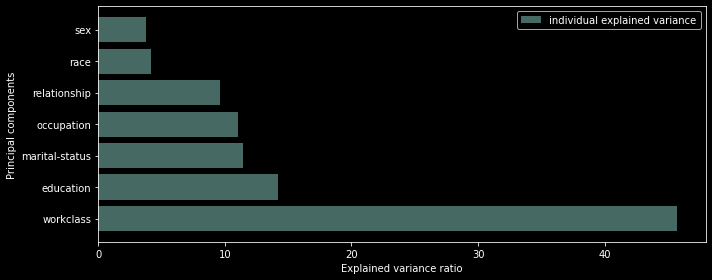

In [55]:
# how many principal components are we going to choose for our new feature subspace?
# ANSWER: explained variance tells us how much information (variance) can be attributed to each of the principal components

cols = train_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('salary')))

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

x_pos = [i for i, _ in enumerate(cols[1:])]

with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 4))

    plt.barh(x_pos, var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.xlabel('Explained variance ratio')
    plt.ylabel('Principal components')
    plt.yticks(x_pos, cols[1:])
    plt.legend(loc='best')
    plt.tight_layout()
    plt.grid(False)

Text(0, 0.5, 'Cumulative explained variance')

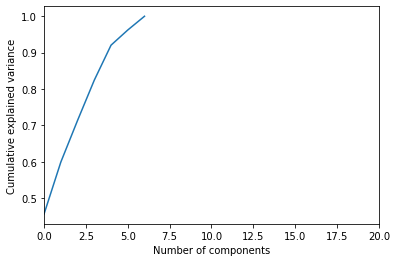

In [56]:
pca = PCA().fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,20,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [57]:
pca = PCA(n_components=6)

# Create model object
pcamlp = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)



x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pcamlp.fit(x_train, y_train)



C:\Users\shubh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.50829542
Iteration 2, loss = 0.46527595
Iteration 3, loss = 0.44724934
Iteration 4, loss = 0.43778680
Iteration 5, loss = 0.43436489
Iteration 6, loss = 0.42962400
Iteration 7, loss = 0.42748204
Iteration 8, loss = 0.42664769
Iteration 9, loss = 0.42394373
Iteration 10, loss = 0.42281796
Iteration 11, loss = 0.42019068
Iteration 12, loss = 0.41942905
Iteration 13, loss = 0.41974518
Iteration 14, loss = 0.41927473
Iteration 15, loss = 0.41675928
Iteration 16, loss = 0.41557161
Iteration 17, loss = 0.41563676
Iteration 18, loss = 0.41444705
Iteration 19, loss = 0.41467558
Iteration 20, loss = 0.41435039
Iteration 21, loss = 0.41405278
Iteration 22, loss = 0.41431703
Iteration 23, loss = 0.41375598
Iteration 24, loss = 0.41324976
Iteration 25, loss = 0.41325086
Iteration 26, loss = 0.41274529
Iteration 27, loss = 0.41419438
Iteration 28, loss = 0.41346768
Iteration 29, loss = 0.41126652
Iteration 30, loss = 0.41202021
Iteration 31, loss = 0.41129515
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [58]:
pca.explained_variance_ratio_

array([0.22156259, 0.15193462, 0.14549537, 0.13823179, 0.13287955,
       0.12305259])

In [59]:
# Make prediction on test dataset
ypred=pcamlp.predict(x_test)

# Calcuate accuracy
accuracy_score(y_test,ypred)



0.809322950465066

In [60]:
print(classification_report(y_test, ypred, target_names=['class A', 'class B']))

              precision    recall  f1-score   support

     class A       0.84      0.92      0.88      6977
     class B       0.66      0.47      0.55      2269

    accuracy                           0.81      9246
   macro avg       0.75      0.69      0.71      9246
weighted avg       0.80      0.81      0.80      9246



## Find Best subset

In [61]:
X = train_df.drop('salary', axis=1)
y = train_df['salary']

X_scaled = StandardScaler().fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [62]:
# finding best feature subset

# params
# X: feature values
# y: labels
# model: fitted classifier object
# subset_len: how many features the desired feature subset will have
# cv: number of folds for cross validation scoring
def best_subset(X, y, model, subset_len, cv=3, verbose=False):
    
    # for elapsed time
    start = time.time()
    
    # getting number of features
    l = X.shape[1]
    
    # getting all the different possible combinations of features for the given
    # subset length
    subsets = list(combinations(range(l), subset_len))
    print(f'{len(subsets)} total combinations for subset length {subset_len}.')
    
    # setting baseline values for best score and subset to update later
    best_score = -np.inf
    best_subset = None
    
    # iterating through possible combinations
    for subset in subsets:
        
        # subset is currently an index, need to get feature names to select df
        subset_nm = [X.columns[i] for i in subset]
        
        # getting CV score from model with subsetted features
        score = cross_val_score(model, X[subset_nm], y, cv=cv).mean()
        
        if verbose:
            print(f'Current subset: {subset_nm}\nScore: {score}')
        
        # updating best score and best subset if a new best score happens
        if score > best_score:
            best_score, best_subset = score, subset
            
    # for elapsed time
    end = time.time()
    
    # printing and returning metrics
    print(f'Elapsed time: {int((end - start)/60)} min. and {(end - start)%60} sec.\n')
    return [[X.columns[i] for i in best_subset], best_score]

# Function to iterate through multiple subset lengths and return a df of
# associated features and CV scores
#
# params
# X: feature values
# y: labels
# model: fitted classifier object
# min_subset_len: lowest number of features for a subset
# max_subset_len: greatest number of features for a subset
# cv: number of folds for cross validation scoring
# verbose: prints each combination
def best_subsets(X, y, model, min_subset_len, max_subset_len, cv=3, verbose=False):
    
    # lists to later create df with
    subset_length = list()
    subset_features = list()
    subset_cv_score = list()
    
    # iterating through desired subset lengths
    for i in range(min_subset_len, max_subset_len+1):
        best = best_subset(X, y, mlp, i, cv=cv, verbose=verbose)
        
        # adding to lists to create df with later
        subset_length.append(i)
        subset_features.append(best[0])
        subset_cv_score.append(best[1])
        
    # creating and returning dataframe with length, feature list, and score for
    # each desired subset length
    df = pd.DataFrame(data={'length': subset_length, 'features': subset_features, 'cv_score': subset_cv_score})
    return df

In [63]:
# first, we will find the best subset for 6 features with verbose=True to show
# process of scoring all subsets
best_subset(X, y, mlp, 6, verbose=True)

7 total combinations for subset length 6.
Iteration 1, loss = 0.50981445
Iteration 2, loss = 0.46996391
Iteration 3, loss = 0.46322208
Iteration 4, loss = 0.45578035
Iteration 5, loss = 0.44740781
Iteration 6, loss = 0.43808272
Iteration 7, loss = 0.43048889
Iteration 8, loss = 0.42771964
Iteration 9, loss = 0.42235701
Iteration 10, loss = 0.41974894
Iteration 11, loss = 0.41768971
Iteration 12, loss = 0.41615884
Iteration 13, loss = 0.41457331
Iteration 14, loss = 0.41321344
Iteration 15, loss = 0.41425357
Iteration 16, loss = 0.41249397
Iteration 17, loss = 0.41197627
Iteration 18, loss = 0.41097464
Iteration 19, loss = 0.41137739
Iteration 20, loss = 0.41039229
Iteration 21, loss = 0.40923464
Iteration 22, loss = 0.40804509
Iteration 23, loss = 0.40808211
Iteration 24, loss = 0.40849730
Iteration 25, loss = 0.40760666
Iteration 26, loss = 0.40886357
Iteration 27, loss = 0.40871064
Iteration 28, loss = 0.40816876
Iteration 29, loss = 0.40808112
Iteration 30, loss = 0.40709947
Iterati

Iteration 62, loss = 0.41138912
Iteration 63, loss = 0.41208220
Iteration 64, loss = 0.41015964
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Current subset: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
Score: 0.8019513008672448
Iteration 1, loss = 0.50952437
Iteration 2, loss = 0.47134533
Iteration 3, loss = 0.45724266
Iteration 4, loss = 0.44823973
Iteration 5, loss = 0.44207392
Iteration 6, loss = 0.43712499
Iteration 7, loss = 0.42870823
Iteration 8, loss = 0.42184197
Iteration 9, loss = 0.41682855
Iteration 10, loss = 0.41452821
Iteration 11, loss = 0.41317767
Iteration 12, loss = 0.40986103
Iteration 13, loss = 0.40881996
Iteration 14, loss = 0.40762752
Iteration 15, loss = 0.40747972
Iteration 16, loss = 0.40792011
Iteration 17, loss = 0.40566526
Iteration 18, loss = 0.40542361
Iteration 19, loss = 0.40432708
Iteration 20, loss = 0.40471189
Iteration 21, loss = 0.40441162
Iteration 22, loss = 0.403

Iteration 7, loss = 0.45133643
Iteration 8, loss = 0.44761488
Iteration 9, loss = 0.43591512
Iteration 10, loss = 0.43028076
Iteration 11, loss = 0.42759213
Iteration 12, loss = 0.42152609
Iteration 13, loss = 0.41985285
Iteration 14, loss = 0.41785106
Iteration 15, loss = 0.41642405
Iteration 16, loss = 0.41499414
Iteration 17, loss = 0.41517609
Iteration 18, loss = 0.41442574
Iteration 19, loss = 0.41263410
Iteration 20, loss = 0.41458453
Iteration 21, loss = 0.41139771
Iteration 22, loss = 0.41147939
Iteration 23, loss = 0.41134413
Iteration 24, loss = 0.41379544
Iteration 25, loss = 0.41098389
Iteration 26, loss = 0.40947686
Iteration 27, loss = 0.40934919
Iteration 28, loss = 0.40935370
Iteration 29, loss = 0.40893761
Iteration 30, loss = 0.40813253
Iteration 31, loss = 0.40793164
Iteration 32, loss = 0.40755837
Iteration 33, loss = 0.40618673
Iteration 34, loss = 0.40561614
Iteration 35, loss = 0.40713425
Iteration 36, loss = 0.40487892
Iteration 37, loss = 0.40489908
Iteration 3

Iteration 55, loss = 0.42516082
Iteration 56, loss = 0.42515019
Iteration 57, loss = 0.42507744
Iteration 58, loss = 0.42519164
Iteration 59, loss = 0.42592284
Iteration 60, loss = 0.42512388
Iteration 61, loss = 0.42360824
Iteration 62, loss = 0.42467854
Iteration 63, loss = 0.42449882
Iteration 64, loss = 0.42482068
Iteration 65, loss = 0.42520090
Iteration 66, loss = 0.42550267
Iteration 67, loss = 0.42408068
Iteration 68, loss = 0.42446240
Iteration 69, loss = 0.42506506
Iteration 70, loss = 0.42432568
Iteration 71, loss = 0.42405658
Iteration 72, loss = 0.42618397
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51188113
Iteration 2, loss = 0.48403399
Iteration 3, loss = 0.47763487
Iteration 4, loss = 0.47246042
Iteration 5, loss = 0.46765060
Iteration 6, loss = 0.46084145
Iteration 7, loss = 0.45343119
Iteration 8, loss = 0.44557273
Iteration 9, loss = 0.43967128
Iteration 10, loss = 0.43585736
Iteration 11, loss = 0.

Iteration 20, loss = 0.43202357
Iteration 21, loss = 0.42949872
Iteration 22, loss = 0.42785727
Iteration 23, loss = 0.42836320
Iteration 24, loss = 0.42851666
Iteration 25, loss = 0.42620147
Iteration 26, loss = 0.42665248
Iteration 27, loss = 0.42466914
Iteration 28, loss = 0.42627620
Iteration 29, loss = 0.42668146
Iteration 30, loss = 0.42493747
Iteration 31, loss = 0.42552571
Iteration 32, loss = 0.42527924
Iteration 33, loss = 0.42514642
Iteration 34, loss = 0.42408764
Iteration 35, loss = 0.42469938
Iteration 36, loss = 0.42293499
Iteration 37, loss = 0.42623256
Iteration 38, loss = 0.42415592
Iteration 39, loss = 0.42215357
Iteration 40, loss = 0.42545575
Iteration 41, loss = 0.42374518
Iteration 42, loss = 0.42384175
Iteration 43, loss = 0.42244481
Iteration 44, loss = 0.42285008
Iteration 45, loss = 0.42304250
Iteration 46, loss = 0.42348273
Iteration 47, loss = 0.42480677
Iteration 48, loss = 0.42272365
Iteration 49, loss = 0.42408819
Iteration 50, loss = 0.42553356
Training

Iteration 43, loss = 0.41501314
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51767102
Iteration 2, loss = 0.47167643
Iteration 3, loss = 0.46349413
Iteration 4, loss = 0.44877489
Iteration 5, loss = 0.43625389
Iteration 6, loss = 0.42914078
Iteration 7, loss = 0.42610778
Iteration 8, loss = 0.42463011
Iteration 9, loss = 0.42513077
Iteration 10, loss = 0.42351146
Iteration 11, loss = 0.42275861
Iteration 12, loss = 0.42317334
Iteration 13, loss = 0.42214421
Iteration 14, loss = 0.42195903
Iteration 15, loss = 0.42326757
Iteration 16, loss = 0.42167062
Iteration 17, loss = 0.42205016
Iteration 18, loss = 0.42211656
Iteration 19, loss = 0.42357137
Iteration 20, loss = 0.42146828
Iteration 21, loss = 0.42264744
Iteration 22, loss = 0.42166501
Iteration 23, loss = 0.42157416
Iteration 24, loss = 0.42167198
Iteration 25, loss = 0.42091924
Iteration 26, loss = 0.42101510
Iteration 27, loss = 0.42136753
Iteration 28, loss = 0.

[['workclass',
  'education',
  'marital-status',
  'occupation',
  'relationship',
  'sex'],
 0.8118745830553703]

In [64]:
# # next, we will search for the best subset between 1 feature and 8 features.

# subsets_df = best_subsets(X, y, mlp, min_subset_len=1, max_subset_len=8, cv=3)
# print('Top three feature subsets:')
# print(subsets_df.sort_values(by='cv_score', ascending=False).head(3))
# best_subset_ftrs = subsets_df[subsets_df.cv_score == max(subsets_df.cv_score)]
# print('Best feature subset:')
# for f in best_subset_ftrs.features:
#     print(f)

In [65]:
X = test_df.drop('salary', axis=1)
y = test_df['salary']

X_scaled = StandardScaler().fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [66]:
# finding best feature subset

# params
# X: feature values
# y: labels
# model: fitted classifier object
# subset_len: how many features the desired feature subset will have
# cv: number of folds for cross validation scoring
def best_subset(X, y, model, subset_len, cv=3, verbose=False):
    
    # for elapsed time
    start = time.time()
    
    # getting number of features
    l = X.shape[1]
    
    # getting all the different possible combinations of features for the given
    # subset length
    subsets = list(combinations(range(l), subset_len))
    print(f'{len(subsets)} total combinations for subset length {subset_len}.')
    
    # setting baseline values for best score and subset to update later
    best_score = -np.inf
    best_subset = None
    
    # iterating through possible combinations
    for subset in subsets:
        
        # subset is currently an index, need to get feature names to select df
        subset_nm = [X.columns[i] for i in subset]
        
        # getting CV score from model with subsetted features
        score = cross_val_score(model, X[subset_nm], y, cv=cv).mean()
        
        if verbose:
            print(f'Current subset: {subset_nm}\nScore: {score}')
        
        # updating best score and best subset if a new best score happens
        if score > best_score:
            best_score, best_subset = score, subset
            
    # for elapsed time
    end = time.time()
    
    # printing and returning metrics
    print(f'Elapsed time: {int((end - start)/60)} min. and {(end - start)%60} sec.\n')
    return [[X.columns[i] for i in best_subset], best_score]

# Function to iterate through multiple subset lengths and return a df of
# associated features and CV scores
#
# params
# X: feature values
# y: labels
# model: fitted classifier object
# min_subset_len: lowest number of features for a subset
# max_subset_len: greatest number of features for a subset
# cv: number of folds for cross validation scoring
# verbose: prints each combination
def best_subsets(X, y, model, min_subset_len, max_subset_len, cv=3, verbose=False):
    
    # lists to later create df with
    subset_length = list()
    subset_features = list()
    subset_cv_score = list()
    
    # iterating through desired subset lengths
    for i in range(min_subset_len, max_subset_len+1):
        best = best_subset(X, y, mlp, i, cv=cv, verbose=verbose)
        
        # adding to lists to create df with later
        subset_length.append(i)
        subset_features.append(best[0])
        subset_cv_score.append(best[1])
        
    # creating and returning dataframe with length, feature list, and score for
    # each desired subset length
    df = pd.DataFrame(data={'length': subset_length, 'features': subset_features, 'cv_score': subset_cv_score})
    return df

In [67]:
# first, we will find the best subset for 6 features with verbose=True to show
# process of scoring all subsets
best_subset(X, y, mlp, 6, verbose=True)

7 total combinations for subset length 6.
Iteration 1, loss = 0.57377840
Iteration 2, loss = 0.50839639
Iteration 3, loss = 0.49721693
Iteration 4, loss = 0.49060687
Iteration 5, loss = 0.48859896
Iteration 6, loss = 0.48093577
Iteration 7, loss = 0.47938930
Iteration 8, loss = 0.47761786
Iteration 9, loss = 0.47567216
Iteration 10, loss = 0.46993163
Iteration 11, loss = 0.46994371
Iteration 12, loss = 0.46681875
Iteration 13, loss = 0.46416285
Iteration 14, loss = 0.46236532
Iteration 15, loss = 0.46157276
Iteration 16, loss = 0.46048842
Iteration 17, loss = 0.45685223
Iteration 18, loss = 0.45850853
Iteration 19, loss = 0.45651663
Iteration 20, loss = 0.45607661
Iteration 21, loss = 0.45521926
Iteration 22, loss = 0.45407269
Iteration 23, loss = 0.45547599
Iteration 24, loss = 0.45109598
Iteration 25, loss = 0.45208777
Iteration 26, loss = 0.44893924
Iteration 27, loss = 0.44365396
Iteration 28, loss = 0.44567616
Iteration 29, loss = 0.44159605
Iteration 30, loss = 0.44184294
Iterati

Iteration 14, loss = 0.45568535
Iteration 15, loss = 0.45379502
Iteration 16, loss = 0.45232118
Iteration 17, loss = 0.44761389
Iteration 18, loss = 0.44464679
Iteration 19, loss = 0.44396211
Iteration 20, loss = 0.44331480
Iteration 21, loss = 0.44581736
Iteration 22, loss = 0.44238321
Iteration 23, loss = 0.43883351
Iteration 24, loss = 0.43524349
Iteration 25, loss = 0.43775546
Iteration 26, loss = 0.43281251
Iteration 27, loss = 0.43120793
Iteration 28, loss = 0.43378157
Iteration 29, loss = 0.42991111
Iteration 30, loss = 0.43180181
Iteration 31, loss = 0.43206168
Iteration 32, loss = 0.43677869
Iteration 33, loss = 0.43056504
Iteration 34, loss = 0.42868616
Iteration 35, loss = 0.42760621
Iteration 36, loss = 0.42468261
Iteration 37, loss = 0.42583579
Iteration 38, loss = 0.42706764
Iteration 39, loss = 0.42524004
Iteration 40, loss = 0.42530440
Iteration 41, loss = 0.42636472
Iteration 42, loss = 0.42880072
Iteration 43, loss = 0.42421033
Iteration 44, loss = 0.42397113
Iteratio

Iteration 4, loss = 0.48225224
Iteration 5, loss = 0.48192635
Iteration 6, loss = 0.47385249
Iteration 7, loss = 0.47348354
Iteration 8, loss = 0.47157984
Iteration 9, loss = 0.47103623
Iteration 10, loss = 0.46639629
Iteration 11, loss = 0.46690235
Iteration 12, loss = 0.46639040
Iteration 13, loss = 0.46413469
Iteration 14, loss = 0.46166982
Iteration 15, loss = 0.46180431
Iteration 16, loss = 0.46038506
Iteration 17, loss = 0.45802302
Iteration 18, loss = 0.45811468
Iteration 19, loss = 0.45576728
Iteration 20, loss = 0.45602834
Iteration 21, loss = 0.45451533
Iteration 22, loss = 0.45246402
Iteration 23, loss = 0.45199238
Iteration 24, loss = 0.44854902
Iteration 25, loss = 0.44681290
Iteration 26, loss = 0.44663294
Iteration 27, loss = 0.44313465
Iteration 28, loss = 0.44230575
Iteration 29, loss = 0.43996896
Iteration 30, loss = 0.44126758
Iteration 31, loss = 0.43906068
Iteration 32, loss = 0.43980650
Iteration 33, loss = 0.43771488
Iteration 34, loss = 0.43694494
Iteration 35, 

Iteration 75, loss = 0.42200252
Iteration 76, loss = 0.41906809
Iteration 77, loss = 0.42060675
Iteration 78, loss = 0.42034246
Iteration 79, loss = 0.42055757
Iteration 80, loss = 0.41954270
Iteration 81, loss = 0.42029166
Iteration 82, loss = 0.41797070
Iteration 83, loss = 0.41959204
Iteration 84, loss = 0.42021327
Iteration 85, loss = 0.42066802
Iteration 86, loss = 0.41932488
Iteration 87, loss = 0.42026187
Iteration 88, loss = 0.41876488
Iteration 89, loss = 0.42027042
Iteration 90, loss = 0.41812944
Iteration 91, loss = 0.42056066
Iteration 92, loss = 0.41941529
Iteration 93, loss = 0.42053832
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Current subset: ['workclass', 'education', 'marital-status', 'occupation', 'race', 'sex']
Score: 0.7945057322085226
Iteration 1, loss = 0.56240736
Iteration 2, loss = 0.50366215
Iteration 3, loss = 0.49434575
Iteration 4, loss = 0.49074956
Iteration 5, loss = 0.48765931
Iteration 6, loss = 0.48453934


Iteration 46, loss = 0.42765190
Iteration 47, loss = 0.42787710
Iteration 48, loss = 0.42801914
Iteration 49, loss = 0.42802768
Iteration 50, loss = 0.42911780
Iteration 51, loss = 0.42924112
Iteration 52, loss = 0.42714343
Iteration 53, loss = 0.42722331
Iteration 54, loss = 0.42894618
Iteration 55, loss = 0.42681570
Iteration 56, loss = 0.42889000
Iteration 57, loss = 0.43042775
Iteration 58, loss = 0.43010650
Iteration 59, loss = 0.42752771
Iteration 60, loss = 0.42702707
Iteration 61, loss = 0.42737394
Iteration 62, loss = 0.42729230
Iteration 63, loss = 0.42693565
Iteration 64, loss = 0.42810934
Iteration 65, loss = 0.42779466
Iteration 66, loss = 0.42740668
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Current subset: ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex']
Score: 0.7776335712740644
Iteration 1, loss = 0.60788281
Iteration 2, loss = 0.53781315
Iteration 3, loss = 0.52733824
Iteration 4, loss = 0.52510

Iteration 70, loss = 0.42832320
Iteration 71, loss = 0.43386264
Iteration 72, loss = 0.44040778
Iteration 73, loss = 0.43222526
Iteration 74, loss = 0.43198237
Iteration 75, loss = 0.43504002
Iteration 76, loss = 0.43232171
Iteration 77, loss = 0.43410218
Iteration 78, loss = 0.42892392
Iteration 79, loss = 0.42983562
Iteration 80, loss = 0.43004756
Iteration 81, loss = 0.43131127
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Current subset: ['workclass', 'education', 'occupation', 'relationship', 'race', 'sex']
Score: 0.7763357127406446
Iteration 1, loss = 0.59341586
Iteration 2, loss = 0.49064608
Iteration 3, loss = 0.48389224
Iteration 4, loss = 0.48209326
Iteration 5, loss = 0.48201024
Iteration 6, loss = 0.47610467
Iteration 7, loss = 0.47421909
Iteration 8, loss = 0.47030449
Iteration 9, loss = 0.46498888
Iteration 10, loss = 0.45715203
Iteration 11, loss = 0.45453585
Iteration 12, loss = 0.45247556
Iteration 13, loss = 0.44806511
Itera

Iteration 22, loss = 0.44926546
Iteration 23, loss = 0.45056616
Iteration 24, loss = 0.44365307
Iteration 25, loss = 0.44379312
Iteration 26, loss = 0.44347441
Iteration 27, loss = 0.43734791
Iteration 28, loss = 0.43423890
Iteration 29, loss = 0.43368138
Iteration 30, loss = 0.43333889
Iteration 31, loss = 0.43367783
Iteration 32, loss = 0.43400734
Iteration 33, loss = 0.42982651
Iteration 34, loss = 0.42539248
Iteration 35, loss = 0.42664045
Iteration 36, loss = 0.42819270
Iteration 37, loss = 0.42522170
Iteration 38, loss = 0.42638905
Iteration 39, loss = 0.42397374
Iteration 40, loss = 0.42283797
Iteration 41, loss = 0.42193457
Iteration 42, loss = 0.42159351
Iteration 43, loss = 0.42149246
Iteration 44, loss = 0.42407087
Iteration 45, loss = 0.42113104
Iteration 46, loss = 0.42030476
Iteration 47, loss = 0.42022071
Iteration 48, loss = 0.42106322
Iteration 49, loss = 0.42058487
Iteration 50, loss = 0.41987678
Iteration 51, loss = 0.42059575
Iteration 52, loss = 0.41971487
Iteratio

Iteration 89, loss = 0.42065779
Iteration 90, loss = 0.41722387
Iteration 91, loss = 0.41801361
Iteration 92, loss = 0.41691627
Iteration 93, loss = 0.41633203
Iteration 94, loss = 0.41701787
Iteration 95, loss = 0.41565640
Iteration 96, loss = 0.41656196
Iteration 97, loss = 0.41663461
Iteration 98, loss = 0.41876842
Iteration 99, loss = 0.41829626
Iteration 100, loss = 0.41451283
Iteration 101, loss = 0.41674395
Iteration 102, loss = 0.41425360
Iteration 103, loss = 0.41564411
Iteration 104, loss = 0.41422548
Iteration 105, loss = 0.41534802
Iteration 106, loss = 0.41562793
Iteration 107, loss = 0.41628519
Iteration 108, loss = 0.41696742
Iteration 109, loss = 0.41288865
Iteration 110, loss = 0.41571886
Iteration 111, loss = 0.41491081
Iteration 112, loss = 0.41452513
Iteration 113, loss = 0.41440934
Iteration 114, loss = 0.41301819
Iteration 115, loss = 0.41419346
Iteration 116, loss = 0.41261476
Iteration 117, loss = 0.41210266
Iteration 118, loss = 0.41201130
Iteration 119, loss =

[['education', 'marital-status', 'occupation', 'relationship', 'race', 'sex'],
 0.8043478260869565]

In [68]:
# next, we will search for the best subset between 1 feature and 8 features.

subsets_df = best_subsets(X, y, mlp, min_subset_len=1, max_subset_len=8, cv=3)
print('Top three feature subsets:')
print(subsets_df.sort_values(by='cv_score', ascending=False).head(3))
best_subset_ftrs = subsets_df[subsets_df.cv_score == max(subsets_df.cv_score)]
print('Best feature subset:')
for f in best_subset_ftrs.features:
    print(f)

7 total combinations for subset length 1.
Iteration 1, loss = 0.56346776
Iteration 2, loss = 0.55350690
Iteration 3, loss = 0.55254310
Iteration 4, loss = 0.55238880
Iteration 5, loss = 0.55132882
Iteration 6, loss = 0.55060668
Iteration 7, loss = 0.54994861
Iteration 8, loss = 0.54956677
Iteration 9, loss = 0.54926930
Iteration 10, loss = 0.54827445
Iteration 11, loss = 0.54864987
Iteration 12, loss = 0.54774745
Iteration 13, loss = 0.54766285
Iteration 14, loss = 0.54705419
Iteration 15, loss = 0.54653268
Iteration 16, loss = 0.54698462
Iteration 17, loss = 0.54655957
Iteration 18, loss = 0.54606429
Iteration 19, loss = 0.54548374
Iteration 20, loss = 0.54539383
Iteration 21, loss = 0.54557531
Iteration 22, loss = 0.54491636
Iteration 23, loss = 0.54517788
Iteration 24, loss = 0.54621007
Iteration 25, loss = 0.54523984
Iteration 26, loss = 0.54585669
Iteration 27, loss = 0.54459532
Iteration 28, loss = 0.54604265
Iteration 29, loss = 0.54483165
Iteration 30, loss = 0.54512674
Iterati

Iteration 24, loss = 0.53768832
Iteration 25, loss = 0.53737029
Iteration 26, loss = 0.53679322
Iteration 27, loss = 0.53683816
Iteration 28, loss = 0.53879956
Iteration 29, loss = 0.53769859
Iteration 30, loss = 0.53697268
Iteration 31, loss = 0.53699174
Iteration 32, loss = 0.53724373
Iteration 33, loss = 0.53782284
Iteration 34, loss = 0.53741896
Iteration 35, loss = 0.53715951
Iteration 36, loss = 0.53689853
Iteration 37, loss = 0.53794864
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58741350
Iteration 2, loss = 0.53221404
Iteration 3, loss = 0.50178241
Iteration 4, loss = 0.48212682
Iteration 5, loss = 0.47458711
Iteration 6, loss = 0.47217856
Iteration 7, loss = 0.47058287
Iteration 8, loss = 0.46948332
Iteration 9, loss = 0.46749837
Iteration 10, loss = 0.46586775
Iteration 11, loss = 0.46544863
Iteration 12, loss = 0.46363250
Iteration 13, loss = 0.46240949
Iteration 14, loss = 0.46233625
Iteration 15, loss = 0.

Iteration 18, loss = 0.52276776
Iteration 19, loss = 0.52183813
Iteration 20, loss = 0.52271784
Iteration 21, loss = 0.52223214
Iteration 22, loss = 0.52195187
Iteration 23, loss = 0.52068430
Iteration 24, loss = 0.52008143
Iteration 25, loss = 0.51940324
Iteration 26, loss = 0.52017902
Iteration 27, loss = 0.51951860
Iteration 28, loss = 0.51963632
Iteration 29, loss = 0.51931753
Iteration 30, loss = 0.51890910
Iteration 31, loss = 0.51988427
Iteration 32, loss = 0.51795752
Iteration 33, loss = 0.51797641
Iteration 34, loss = 0.51812369
Iteration 35, loss = 0.51848172
Iteration 36, loss = 0.51825081
Iteration 37, loss = 0.51781136
Iteration 38, loss = 0.51704414
Iteration 39, loss = 0.51765512
Iteration 40, loss = 0.51999749
Iteration 41, loss = 0.51708123
Iteration 42, loss = 0.51772104
Iteration 43, loss = 0.52042349
Iteration 44, loss = 0.51827798
Iteration 45, loss = 0.51699350
Iteration 46, loss = 0.51705467
Iteration 47, loss = 0.51822493
Iteration 48, loss = 0.51642361
Iteratio

Iteration 55, loss = 0.45936492
Iteration 56, loss = 0.46138503
Iteration 57, loss = 0.45901235
Iteration 58, loss = 0.45891503
Iteration 59, loss = 0.45911214
Iteration 60, loss = 0.45759151
Iteration 61, loss = 0.45811599
Iteration 62, loss = 0.46028786
Iteration 63, loss = 0.46038834
Iteration 64, loss = 0.45592254
Iteration 65, loss = 0.45876568
Iteration 66, loss = 0.45625925
Iteration 67, loss = 0.45627119
Iteration 68, loss = 0.45691608
Iteration 69, loss = 0.45585599
Iteration 70, loss = 0.45399674
Iteration 71, loss = 0.45400603
Iteration 72, loss = 0.45430966
Iteration 73, loss = 0.45570063
Iteration 74, loss = 0.45356660
Iteration 75, loss = 0.45372282
Iteration 76, loss = 0.45229062
Iteration 77, loss = 0.45298256
Iteration 78, loss = 0.45359929
Iteration 79, loss = 0.45245616
Iteration 80, loss = 0.45280324
Iteration 81, loss = 0.45172983
Iteration 82, loss = 0.45135542
Iteration 83, loss = 0.45032725
Iteration 84, loss = 0.45085885
Iteration 85, loss = 0.45235344
Iteratio

Iteration 2, loss = 0.53126720
Iteration 3, loss = 0.52862465
Iteration 4, loss = 0.52859518
Iteration 5, loss = 0.52914275
Iteration 6, loss = 0.52859450
Iteration 7, loss = 0.52845498
Iteration 8, loss = 0.52896159
Iteration 9, loss = 0.52889030
Iteration 10, loss = 0.52906378
Iteration 11, loss = 0.52902667
Iteration 12, loss = 0.52906486
Iteration 13, loss = 0.52821708
Iteration 14, loss = 0.52850519
Iteration 15, loss = 0.52847855
Iteration 16, loss = 0.52790803
Iteration 17, loss = 0.52977635
Iteration 18, loss = 0.52862309
Iteration 19, loss = 0.52927632
Iteration 20, loss = 0.52987027
Iteration 21, loss = 0.52947267
Iteration 22, loss = 0.52855197
Iteration 23, loss = 0.52838221
Iteration 24, loss = 0.52839768
Iteration 25, loss = 0.52823003
Iteration 26, loss = 0.52915225
Iteration 27, loss = 0.52859899
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54773419
Iteration 2, loss = 0.53231803
Iteration 3, loss = 0.52

Iteration 28, loss = 0.45348670
Iteration 29, loss = 0.45272211
Iteration 30, loss = 0.45348351
Iteration 31, loss = 0.45308714
Iteration 32, loss = 0.45488549
Iteration 33, loss = 0.45422382
Iteration 34, loss = 0.45483814
Iteration 35, loss = 0.45434631
Iteration 36, loss = 0.45248993
Iteration 37, loss = 0.45351255
Iteration 38, loss = 0.45395917
Iteration 39, loss = 0.45243004
Iteration 40, loss = 0.45464698
Iteration 41, loss = 0.45320359
Iteration 42, loss = 0.45258027
Iteration 43, loss = 0.45445509
Iteration 44, loss = 0.45271453
Iteration 45, loss = 0.45267267
Iteration 46, loss = 0.45273393
Iteration 47, loss = 0.45250458
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53245291
Iteration 2, loss = 0.50130782
Iteration 3, loss = 0.49129335
Iteration 4, loss = 0.48351092
Iteration 5, loss = 0.47619796
Iteration 6, loss = 0.46851242
Iteration 7, loss = 0.46202320
Iteration 8, loss = 0.46038148
Iteration 9, loss = 0.

Iteration 30, loss = 0.51838752
Iteration 31, loss = 0.51951854
Iteration 32, loss = 0.51554707
Iteration 33, loss = 0.51605388
Iteration 34, loss = 0.51456765
Iteration 35, loss = 0.51245197
Iteration 36, loss = 0.50982585
Iteration 37, loss = 0.50709205
Iteration 38, loss = 0.50668361
Iteration 39, loss = 0.50602523
Iteration 40, loss = 0.50751587
Iteration 41, loss = 0.50873374
Iteration 42, loss = 0.50617572
Iteration 43, loss = 0.50560005
Iteration 44, loss = 0.50412113
Iteration 45, loss = 0.50239822
Iteration 46, loss = 0.50338473
Iteration 47, loss = 0.50519547
Iteration 48, loss = 0.50157555
Iteration 49, loss = 0.50221187
Iteration 50, loss = 0.50159066
Iteration 51, loss = 0.50233150
Iteration 52, loss = 0.50496902
Iteration 53, loss = 0.50353164
Iteration 54, loss = 0.50636072
Iteration 55, loss = 0.49942297
Iteration 56, loss = 0.50133507
Iteration 57, loss = 0.49896358
Iteration 58, loss = 0.49911981
Iteration 59, loss = 0.49978563
Iteration 60, loss = 0.49986233
Iteratio

Iteration 15, loss = 0.47542805
Iteration 16, loss = 0.47494549
Iteration 17, loss = 0.47428993
Iteration 18, loss = 0.47286062
Iteration 19, loss = 0.47522303
Iteration 20, loss = 0.47062498
Iteration 21, loss = 0.47087949
Iteration 22, loss = 0.47259596
Iteration 23, loss = 0.47038374
Iteration 24, loss = 0.46921883
Iteration 25, loss = 0.46690536
Iteration 26, loss = 0.46745405
Iteration 27, loss = 0.46883237
Iteration 28, loss = 0.46905889
Iteration 29, loss = 0.46933953
Iteration 30, loss = 0.46671446
Iteration 31, loss = 0.46532258
Iteration 32, loss = 0.46501216
Iteration 33, loss = 0.46836823
Iteration 34, loss = 0.46549105
Iteration 35, loss = 0.46338320
Iteration 36, loss = 0.46260756
Iteration 37, loss = 0.46123950
Iteration 38, loss = 0.46360959
Iteration 39, loss = 0.46202224
Iteration 40, loss = 0.46316687
Iteration 41, loss = 0.46151414
Iteration 42, loss = 0.45940124
Iteration 43, loss = 0.46234271
Iteration 44, loss = 0.46004867
Iteration 45, loss = 0.46006075
Iteratio

Iteration 22, loss = 0.51904182
Iteration 23, loss = 0.51826884
Iteration 24, loss = 0.51803195
Iteration 25, loss = 0.51943513
Iteration 26, loss = 0.51895681
Iteration 27, loss = 0.51841938
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58144178
Iteration 2, loss = 0.53357915
Iteration 3, loss = 0.52394400
Iteration 4, loss = 0.52207016
Iteration 5, loss = 0.52132907
Iteration 6, loss = 0.52111666
Iteration 7, loss = 0.51931404
Iteration 8, loss = 0.52204761
Iteration 9, loss = 0.52183644
Iteration 10, loss = 0.52082000
Iteration 11, loss = 0.52185181
Iteration 12, loss = 0.52064912
Iteration 13, loss = 0.52225423
Iteration 14, loss = 0.52116159
Iteration 15, loss = 0.52045866
Iteration 16, loss = 0.52107352
Iteration 17, loss = 0.52082411
Iteration 18, loss = 0.51979082
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.53849121
Iteration 2, loss = 0.50156541

Iteration 5, loss = 0.52864678
Iteration 6, loss = 0.53071005
Iteration 7, loss = 0.52455897
Iteration 8, loss = 0.52264707
Iteration 9, loss = 0.52224496
Iteration 10, loss = 0.52253116
Iteration 11, loss = 0.51826669
Iteration 12, loss = 0.51610065
Iteration 13, loss = 0.51606980
Iteration 14, loss = 0.51603079
Iteration 15, loss = 0.51519063
Iteration 16, loss = 0.51460221
Iteration 17, loss = 0.51511861
Iteration 18, loss = 0.51447114
Iteration 19, loss = 0.51364581
Iteration 20, loss = 0.51614757
Iteration 21, loss = 0.51475285
Iteration 22, loss = 0.51344526
Iteration 23, loss = 0.51345846
Iteration 24, loss = 0.51344058
Iteration 25, loss = 0.51149200
Iteration 26, loss = 0.51240350
Iteration 27, loss = 0.51322414
Iteration 28, loss = 0.51402869
Iteration 29, loss = 0.51267911
Iteration 30, loss = 0.51211051
Iteration 31, loss = 0.51085595
Iteration 32, loss = 0.51356845
Iteration 33, loss = 0.51213132
Iteration 34, loss = 0.50944016
Iteration 35, loss = 0.51050906
Iteration 36,

Iteration 38, loss = 0.46561331
Iteration 39, loss = 0.46449333
Iteration 40, loss = 0.46368145
Iteration 41, loss = 0.46541273
Iteration 42, loss = 0.46363298
Iteration 43, loss = 0.46428307
Iteration 44, loss = 0.46510111
Iteration 45, loss = 0.46242214
Iteration 46, loss = 0.46159073
Iteration 47, loss = 0.46224175
Iteration 48, loss = 0.46218393
Iteration 49, loss = 0.46100178
Iteration 50, loss = 0.46135665
Iteration 51, loss = 0.46048933
Iteration 52, loss = 0.45937217
Iteration 53, loss = 0.45793992
Iteration 54, loss = 0.45878143
Iteration 55, loss = 0.45880942
Iteration 56, loss = 0.45627617
Iteration 57, loss = 0.45560519
Iteration 58, loss = 0.45537286
Iteration 59, loss = 0.45418227
Iteration 60, loss = 0.46171762
Iteration 61, loss = 0.45439972
Iteration 62, loss = 0.45757714
Iteration 63, loss = 0.45545382
Iteration 64, loss = 0.46118293
Iteration 65, loss = 0.45473607
Iteration 66, loss = 0.45390421
Iteration 67, loss = 0.45281762
Iteration 68, loss = 0.45394973
Iteratio

Iteration 18, loss = 0.53515472
Iteration 19, loss = 0.53607391
Iteration 20, loss = 0.53585545
Iteration 21, loss = 0.53524668
Iteration 22, loss = 0.53558072
Iteration 23, loss = 0.53481489
Iteration 24, loss = 0.53364658
Iteration 25, loss = 0.53379872
Iteration 26, loss = 0.53339183
Iteration 27, loss = 0.53427281
Iteration 28, loss = 0.53469177
Iteration 29, loss = 0.53581952
Iteration 30, loss = 0.53362104
Iteration 31, loss = 0.53345857
Iteration 32, loss = 0.53563794
Iteration 33, loss = 0.53373555
Iteration 34, loss = 0.53352790
Iteration 35, loss = 0.53408824
Iteration 36, loss = 0.53317336
Iteration 37, loss = 0.53330859
Iteration 38, loss = 0.53301943
Iteration 39, loss = 0.53272311
Iteration 40, loss = 0.53329634
Iteration 41, loss = 0.53418718
Iteration 42, loss = 0.53247035
Iteration 43, loss = 0.53369162
Iteration 44, loss = 0.53391102
Iteration 45, loss = 0.53409535
Iteration 46, loss = 0.53234868
Iteration 47, loss = 0.53254340
Iteration 48, loss = 0.53341989
Iteratio

Iteration 81, loss = 0.42220651
Iteration 82, loss = 0.42214102
Iteration 83, loss = 0.42265605
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54808499
Iteration 2, loss = 0.49206326
Iteration 3, loss = 0.47959105
Iteration 4, loss = 0.47305776
Iteration 5, loss = 0.46388843
Iteration 6, loss = 0.45829406
Iteration 7, loss = 0.44958880
Iteration 8, loss = 0.44384979
Iteration 9, loss = 0.44147078
Iteration 10, loss = 0.43753793
Iteration 11, loss = 0.43750129
Iteration 12, loss = 0.43492326
Iteration 13, loss = 0.43407067
Iteration 14, loss = 0.43260640
Iteration 15, loss = 0.43150256
Iteration 16, loss = 0.43425280
Iteration 17, loss = 0.43033935
Iteration 18, loss = 0.42950181
Iteration 19, loss = 0.42876326
Iteration 20, loss = 0.43312598
Iteration 21, loss = 0.42941679
Iteration 22, loss = 0.42911610
Iteration 23, loss = 0.43086384
Iteration 24, loss = 0.42658135
Iteration 25, loss = 0.42699518
Iteration 26, loss = 0.

Iteration 15, loss = 0.45552026
Iteration 16, loss = 0.45563664
Iteration 17, loss = 0.45524500
Iteration 18, loss = 0.45543976
Iteration 19, loss = 0.45517610
Iteration 20, loss = 0.45767864
Iteration 21, loss = 0.45525842
Iteration 22, loss = 0.45545688
Iteration 23, loss = 0.45607823
Iteration 24, loss = 0.45536762
Iteration 25, loss = 0.45523350
Iteration 26, loss = 0.45423506
Iteration 27, loss = 0.45488968
Iteration 28, loss = 0.45415336
Iteration 29, loss = 0.45518827
Iteration 30, loss = 0.45372478
Iteration 31, loss = 0.45348480
Iteration 32, loss = 0.45362087
Iteration 33, loss = 0.45585426
Iteration 34, loss = 0.45508427
Iteration 35, loss = 0.45399684
Iteration 36, loss = 0.45339735
Iteration 37, loss = 0.45348303
Iteration 38, loss = 0.45232090
Iteration 39, loss = 0.45580791
Iteration 40, loss = 0.45596765
Iteration 41, loss = 0.45519566
Iteration 42, loss = 0.45270722
Iteration 43, loss = 0.45352396
Iteration 44, loss = 0.45484933
Iteration 45, loss = 0.45219393
Iteratio

Iteration 56, loss = 0.45496750
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52805417
Iteration 2, loss = 0.48256489
Iteration 3, loss = 0.47622977
Iteration 4, loss = 0.47410187
Iteration 5, loss = 0.47265306
Iteration 6, loss = 0.47272010
Iteration 7, loss = 0.47020532
Iteration 8, loss = 0.46908697
Iteration 9, loss = 0.46788974
Iteration 10, loss = 0.46786863
Iteration 11, loss = 0.46605339
Iteration 12, loss = 0.46450003
Iteration 13, loss = 0.46317693
Iteration 14, loss = 0.46295019
Iteration 15, loss = 0.46257823
Iteration 16, loss = 0.46013322
Iteration 17, loss = 0.46062474
Iteration 18, loss = 0.45905195
Iteration 19, loss = 0.45835161
Iteration 20, loss = 0.45770768
Iteration 21, loss = 0.45707271
Iteration 22, loss = 0.45753700
Iteration 23, loss = 0.45718356
Iteration 24, loss = 0.45626311
Iteration 25, loss = 0.45630057
Iteration 26, loss = 0.45655822
Iteration 27, loss = 0.45613926
Iteration 28, loss = 0.

Iteration 38, loss = 0.47335746
Iteration 39, loss = 0.46923983
Iteration 40, loss = 0.46945454
Iteration 41, loss = 0.47240014
Iteration 42, loss = 0.46814607
Iteration 43, loss = 0.46878182
Iteration 44, loss = 0.47047713
Iteration 45, loss = 0.46602633
Iteration 46, loss = 0.46705181
Iteration 47, loss = 0.46735805
Iteration 48, loss = 0.46571567
Iteration 49, loss = 0.46696864
Iteration 50, loss = 0.46598148
Iteration 51, loss = 0.46578899
Iteration 52, loss = 0.46562343
Iteration 53, loss = 0.46565713
Iteration 54, loss = 0.46685527
Iteration 55, loss = 0.46511996
Iteration 56, loss = 0.46541600
Iteration 57, loss = 0.46565852
Iteration 58, loss = 0.46531052
Iteration 59, loss = 0.46513110
Iteration 60, loss = 0.46924387
Iteration 61, loss = 0.46585118
Iteration 62, loss = 0.46447827
Iteration 63, loss = 0.46690299
Iteration 64, loss = 0.46955059
Iteration 65, loss = 0.46503244
Iteration 66, loss = 0.46613923
Iteration 67, loss = 0.46502854
Iteration 68, loss = 0.46443616
Iteratio

Iteration 39, loss = 0.48292895
Iteration 40, loss = 0.48229094
Iteration 41, loss = 0.48255244
Iteration 42, loss = 0.48213305
Iteration 43, loss = 0.48629562
Iteration 44, loss = 0.47885496
Iteration 45, loss = 0.47420743
Iteration 46, loss = 0.47191464
Iteration 47, loss = 0.46969642
Iteration 48, loss = 0.46648859
Iteration 49, loss = 0.46171262
Iteration 50, loss = 0.45977934
Iteration 51, loss = 0.46057184
Iteration 52, loss = 0.46550461
Iteration 53, loss = 0.45779080
Iteration 54, loss = 0.45350210
Iteration 55, loss = 0.45859347
Iteration 56, loss = 0.45189715
Iteration 57, loss = 0.45073687
Iteration 58, loss = 0.44834875
Iteration 59, loss = 0.44463569
Iteration 60, loss = 0.44631667
Iteration 61, loss = 0.44421545
Iteration 62, loss = 0.44635034
Iteration 63, loss = 0.44367432
Iteration 64, loss = 0.44216912
Iteration 65, loss = 0.44144147
Iteration 66, loss = 0.44066501
Iteration 67, loss = 0.44521979
Iteration 68, loss = 0.44068754
Iteration 69, loss = 0.44074095
Iteratio

Iteration 58, loss = 0.49484545
Iteration 59, loss = 0.49539863
Iteration 60, loss = 0.49604728
Iteration 61, loss = 0.49527012
Iteration 62, loss = 0.49496230
Iteration 63, loss = 0.49493970
Iteration 64, loss = 0.49843005
Iteration 65, loss = 0.49340946
Iteration 66, loss = 0.49406981
Iteration 67, loss = 0.49199387
Iteration 68, loss = 0.49113196
Iteration 69, loss = 0.49180407
Iteration 70, loss = 0.49220853
Iteration 71, loss = 0.49135850
Iteration 72, loss = 0.49020998
Iteration 73, loss = 0.48968040
Iteration 74, loss = 0.49021848
Iteration 75, loss = 0.49051273
Iteration 76, loss = 0.48987314
Iteration 77, loss = 0.48824772
Iteration 78, loss = 0.48780770
Iteration 79, loss = 0.48785148
Iteration 80, loss = 0.48774830
Iteration 81, loss = 0.48721177
Iteration 82, loss = 0.48737647
Iteration 83, loss = 0.48689286
Iteration 84, loss = 0.48805693
Iteration 85, loss = 0.48794173
Iteration 86, loss = 0.48790493
Iteration 87, loss = 0.48941996
Iteration 88, loss = 0.48604884
Iteratio

Iteration 87, loss = 0.45522174
Iteration 88, loss = 0.45254908
Iteration 89, loss = 0.45276813
Iteration 90, loss = 0.45299623
Iteration 91, loss = 0.45500374
Iteration 92, loss = 0.45430941
Iteration 93, loss = 0.45409854
Iteration 94, loss = 0.45376928
Iteration 95, loss = 0.45251929
Iteration 96, loss = 0.45377120
Iteration 97, loss = 0.45234336
Iteration 98, loss = 0.45264120
Iteration 99, loss = 0.45240944
Iteration 100, loss = 0.45170275
Iteration 101, loss = 0.45281386
Iteration 102, loss = 0.45359817
Iteration 103, loss = 0.45244326
Iteration 104, loss = 0.45163567
Iteration 105, loss = 0.45242794
Iteration 106, loss = 0.45318466
Iteration 107, loss = 0.45293414
Iteration 108, loss = 0.45191024
Iteration 109, loss = 0.45217037
Iteration 110, loss = 0.45241898
Iteration 111, loss = 0.45167174
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.54043448
Iteration 2, loss = 0.49609914
Iteration 3, loss = 0.48901181
Itera

Iteration 52, loss = 0.45273570
Iteration 53, loss = 0.45274478
Iteration 54, loss = 0.45288137
Iteration 55, loss = 0.45269635
Iteration 56, loss = 0.45273217
Iteration 57, loss = 0.45244782
Iteration 58, loss = 0.45286560
Iteration 59, loss = 0.45476099
Iteration 60, loss = 0.45444033
Iteration 61, loss = 0.45163922
Iteration 62, loss = 0.45233341
Iteration 63, loss = 0.45339102
Iteration 64, loss = 0.45320867
Iteration 65, loss = 0.45136058
Iteration 66, loss = 0.45108755
Iteration 67, loss = 0.45174875
Iteration 68, loss = 0.45132767
Iteration 69, loss = 0.45081673
Iteration 70, loss = 0.45379840
Iteration 71, loss = 0.45148362
Iteration 72, loss = 0.45165907
Iteration 73, loss = 0.45069822
Iteration 74, loss = 0.45186286
Iteration 75, loss = 0.45148299
Iteration 76, loss = 0.45036459
Iteration 77, loss = 0.44994546
Iteration 78, loss = 0.45123206
Iteration 79, loss = 0.45217570
Iteration 80, loss = 0.45126978
Iteration 81, loss = 0.44962892
Iteration 82, loss = 0.45026011
Iteratio

Iteration 61, loss = 0.45174037
Iteration 62, loss = 0.45173866
Iteration 63, loss = 0.45197271
Iteration 64, loss = 0.45181479
Iteration 65, loss = 0.45136962
Iteration 66, loss = 0.45153974
Iteration 67, loss = 0.45269042
Iteration 68, loss = 0.45186581
Iteration 69, loss = 0.45172149
Iteration 70, loss = 0.45149713
Iteration 71, loss = 0.45077534
Iteration 72, loss = 0.45063145
Iteration 73, loss = 0.45064306
Iteration 74, loss = 0.45190406
Iteration 75, loss = 0.45019031
Iteration 76, loss = 0.45082052
Iteration 77, loss = 0.44986102
Iteration 78, loss = 0.45061794
Iteration 79, loss = 0.45044983
Iteration 80, loss = 0.45020575
Iteration 81, loss = 0.45046110
Iteration 82, loss = 0.45021330
Iteration 83, loss = 0.45078769
Iteration 84, loss = 0.45047132
Iteration 85, loss = 0.45098664
Iteration 86, loss = 0.44967909
Iteration 87, loss = 0.45050349
Iteration 88, loss = 0.45101181
Iteration 89, loss = 0.45010558
Iteration 90, loss = 0.44935212
Iteration 91, loss = 0.45002374
Iteratio

Iteration 33, loss = 0.47465453
Iteration 34, loss = 0.47784766
Iteration 35, loss = 0.47374803
Iteration 36, loss = 0.47339654
Iteration 37, loss = 0.47360831
Iteration 38, loss = 0.47383843
Iteration 39, loss = 0.47183600
Iteration 40, loss = 0.47275182
Iteration 41, loss = 0.47081693
Iteration 42, loss = 0.47111771
Iteration 43, loss = 0.47193829
Iteration 44, loss = 0.47287834
Iteration 45, loss = 0.47258302
Iteration 46, loss = 0.47162152
Iteration 47, loss = 0.47085364
Iteration 48, loss = 0.47150371
Iteration 49, loss = 0.46999677
Iteration 50, loss = 0.47022175
Iteration 51, loss = 0.46992267
Iteration 52, loss = 0.47223762
Iteration 53, loss = 0.47020752
Iteration 54, loss = 0.46872572
Iteration 55, loss = 0.46961234
Iteration 56, loss = 0.46921486
Iteration 57, loss = 0.46585788
Iteration 58, loss = 0.46358196
Iteration 59, loss = 0.46200033
Iteration 60, loss = 0.46026477
Iteration 61, loss = 0.45802674
Iteration 62, loss = 0.45903816
Iteration 63, loss = 0.46096885
Iteratio

Iteration 52, loss = 0.48773817
Iteration 53, loss = 0.48706888
Iteration 54, loss = 0.48587210
Iteration 55, loss = 0.48781954
Iteration 56, loss = 0.48714462
Iteration 57, loss = 0.48588200
Iteration 58, loss = 0.48573963
Iteration 59, loss = 0.48753544
Iteration 60, loss = 0.48525417
Iteration 61, loss = 0.48625218
Iteration 62, loss = 0.48774270
Iteration 63, loss = 0.48495922
Iteration 64, loss = 0.48679086
Iteration 65, loss = 0.48660527
Iteration 66, loss = 0.48464177
Iteration 67, loss = 0.48581756
Iteration 68, loss = 0.48735004
Iteration 69, loss = 0.48469617
Iteration 70, loss = 0.48562634
Iteration 71, loss = 0.48575862
Iteration 72, loss = 0.48515788
Iteration 73, loss = 0.48388379
Iteration 74, loss = 0.48409150
Iteration 75, loss = 0.48386652
Iteration 76, loss = 0.48386990
Iteration 77, loss = 0.48310922
Iteration 78, loss = 0.48431292
Iteration 79, loss = 0.48431703
Iteration 80, loss = 0.48297574
Iteration 81, loss = 0.48258206
Iteration 82, loss = 0.48310750
Iteratio

Iteration 38, loss = 0.53794396
Iteration 39, loss = 0.53755510
Iteration 40, loss = 0.53738882
Iteration 41, loss = 0.53784159
Iteration 42, loss = 0.53681460
Iteration 43, loss = 0.53741347
Iteration 44, loss = 0.53601940
Iteration 45, loss = 0.53593720
Iteration 46, loss = 0.53716161
Iteration 47, loss = 0.53933122
Iteration 48, loss = 0.53678584
Iteration 49, loss = 0.53383989
Iteration 50, loss = 0.53287558
Iteration 51, loss = 0.53184954
Iteration 52, loss = 0.53305780
Iteration 53, loss = 0.53190639
Iteration 54, loss = 0.53363329
Iteration 55, loss = 0.53230586
Iteration 56, loss = 0.53120806
Iteration 57, loss = 0.53139376
Iteration 58, loss = 0.53059188
Iteration 59, loss = 0.53047728
Iteration 60, loss = 0.53033934
Iteration 61, loss = 0.52965523
Iteration 62, loss = 0.53204734
Iteration 63, loss = 0.53088726
Iteration 64, loss = 0.52999271
Iteration 65, loss = 0.52948814
Iteration 66, loss = 0.52997659
Iteration 67, loss = 0.52884628
Iteration 68, loss = 0.52842383
Iteratio

Iteration 57, loss = 0.53054587
Iteration 58, loss = 0.53096435
Iteration 59, loss = 0.53090892
Iteration 60, loss = 0.53059102
Iteration 61, loss = 0.53038942
Iteration 62, loss = 0.53064534
Iteration 63, loss = 0.53041058
Iteration 64, loss = 0.53023505
Iteration 65, loss = 0.53028077
Iteration 66, loss = 0.53058202
Iteration 67, loss = 0.53057108
Iteration 68, loss = 0.53188321
Iteration 69, loss = 0.53125885
Iteration 70, loss = 0.53016744
Iteration 71, loss = 0.52985285
Iteration 72, loss = 0.52983481
Iteration 73, loss = 0.53068123
Iteration 74, loss = 0.53076818
Iteration 75, loss = 0.53015666
Iteration 76, loss = 0.53033649
Iteration 77, loss = 0.53000272
Iteration 78, loss = 0.52986427
Iteration 79, loss = 0.53029366
Iteration 80, loss = 0.53032618
Iteration 81, loss = 0.52979252
Iteration 82, loss = 0.52993832
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.05325543
Iteration 2, loss = 0.76468563
Iteration 3, los

Iteration 12, loss = 0.55806291
Iteration 13, loss = 0.55763590
Iteration 14, loss = 0.55737365
Iteration 15, loss = 0.55727823
Iteration 16, loss = 0.55717670
Iteration 17, loss = 0.55717928
Iteration 18, loss = 0.55713346
Iteration 19, loss = 0.55712016
Iteration 20, loss = 0.55713131
Iteration 21, loss = 0.55711868
Iteration 22, loss = 0.55714516
Iteration 23, loss = 0.55711542
Iteration 24, loss = 0.55712969
Iteration 25, loss = 0.55713919
Iteration 26, loss = 0.55713874
Iteration 27, loss = 0.55715736
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.03864691
Iteration 2, loss = 0.76487033
Iteration 3, loss = 0.69572205
Iteration 4, loss = 0.64586114
Iteration 5, loss = 0.61202279
Iteration 6, loss = 0.59037828
Iteration 7, loss = 0.57665264
Iteration 8, loss = 0.56829547
Iteration 9, loss = 0.56352580
Iteration 10, loss = 0.56063907
Iteration 11, loss = 0.55906655
Iteration 12, loss = 0.55823013
Iteration 13, loss = 0.

Iteration 77, loss = 0.48494251
Iteration 78, loss = 0.48476984
Iteration 79, loss = 0.48333092
Iteration 80, loss = 0.48291008
Iteration 81, loss = 0.47981868
Iteration 82, loss = 0.47656544
Iteration 83, loss = 0.47663474
Iteration 84, loss = 0.47430513
Iteration 85, loss = 0.47235994
Iteration 86, loss = 0.46878177
Iteration 87, loss = 0.46667292
Iteration 88, loss = 0.46402467
Iteration 89, loss = 0.46367333
Iteration 90, loss = 0.46102836
Iteration 91, loss = 0.45923926
Iteration 92, loss = 0.45583418
Iteration 93, loss = 0.45774159
Iteration 94, loss = 0.45351222
Iteration 95, loss = 0.45603436
Iteration 96, loss = 0.45494895
Iteration 97, loss = 0.45070200
Iteration 98, loss = 0.45211243
Iteration 99, loss = 0.44875736
Iteration 100, loss = 0.44925125
Iteration 101, loss = 0.45013929
Iteration 102, loss = 0.44833545
Iteration 103, loss = 0.44805544
Iteration 104, loss = 0.45115470
Iteration 105, loss = 0.45108770
Iteration 106, loss = 0.45509133
Iteration 107, loss = 0.44692352


Iteration 17, loss = 0.55717657
Iteration 18, loss = 0.55713108
Iteration 19, loss = 0.55711922
Iteration 20, loss = 0.55713052
Iteration 21, loss = 0.55711786
Iteration 22, loss = 0.55714495
Iteration 23, loss = 0.55711460
Iteration 24, loss = 0.55712955
Iteration 25, loss = 0.55713894
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.01981475
Iteration 2, loss = 0.76403029
Iteration 3, loss = 0.69260160
Iteration 4, loss = 0.64300200
Iteration 5, loss = 0.60972128
Iteration 6, loss = 0.58863595
Iteration 7, loss = 0.57541325
Iteration 8, loss = 0.56744489
Iteration 9, loss = 0.56295956
Iteration 10, loss = 0.56027062
Iteration 11, loss = 0.55883086
Iteration 12, loss = 0.55807915
Iteration 13, loss = 0.55766723
Iteration 14, loss = 0.55624811
Iteration 15, loss = 0.55060961
Iteration 16, loss = 0.54709275
Iteration 17, loss = 0.54416215
Iteration 18, loss = 0.54166202
Iteration 19, loss = 0.54117763
Iteration 20, loss = 0.

Iteration 4, loss = 0.64555663
Iteration 5, loss = 0.61185540
Iteration 6, loss = 0.59025983
Iteration 7, loss = 0.57654422
Iteration 8, loss = 0.56821012
Iteration 9, loss = 0.56345974
Iteration 10, loss = 0.56058299
Iteration 11, loss = 0.55901938
Iteration 12, loss = 0.55819182
Iteration 13, loss = 0.55774789
Iteration 14, loss = 0.55751780
Iteration 15, loss = 0.55740018
Iteration 16, loss = 0.55734155
Iteration 17, loss = 0.55731247
Iteration 18, loss = 0.55730103
Iteration 19, loss = 0.55730670
Iteration 20, loss = 0.55731141
Iteration 21, loss = 0.55732007
Iteration 22, loss = 0.55731377
Iteration 23, loss = 0.55732157
Iteration 24, loss = 0.55730358
Iteration 25, loss = 0.55731344
Iteration 26, loss = 0.55734169
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.04432350
Iteration 2, loss = 0.76589681
Iteration 3, loss = 0.69484778
Iteration 4, loss = 0.64533174
Iteration 5, loss = 0.61181322
Iteration 6, loss = 0.590

Iteration 10, loss = 0.56082147
Iteration 11, loss = 0.55918404
Iteration 12, loss = 0.55830883
Iteration 13, loss = 0.55783309
Iteration 14, loss = 0.55758274
Iteration 15, loss = 0.55745075
Iteration 16, loss = 0.55738277
Iteration 17, loss = 0.55734616
Iteration 18, loss = 0.55732836
Iteration 19, loss = 0.55733076
Iteration 20, loss = 0.55733385
Iteration 21, loss = 0.55734073
Iteration 22, loss = 0.55733312
Iteration 23, loss = 0.55733920
Iteration 24, loss = 0.55731992
Iteration 25, loss = 0.55732800
Iteration 26, loss = 0.55735434
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.13168317
Iteration 2, loss = 0.76375225
Iteration 3, loss = 0.69542532
Iteration 4, loss = 0.64648369
Iteration 5, loss = 0.61289878
Iteration 6, loss = 0.59110646
Iteration 7, loss = 0.57706186
Iteration 8, loss = 0.56873610
Iteration 9, loss = 0.56371881
Iteration 10, loss = 0.56081673
Iteration 11, loss = 0.55916684
Iteration 12, loss = 0.

Iteration 18, loss = 0.55730179
Iteration 19, loss = 0.55730704
Iteration 20, loss = 0.55731145
Iteration 21, loss = 0.55731991
Iteration 22, loss = 0.55731372
Iteration 23, loss = 0.55732135
Iteration 24, loss = 0.55730357
Iteration 25, loss = 0.55731331
Iteration 26, loss = 0.55734134
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.16160005
Iteration 2, loss = 0.76415987
Iteration 3, loss = 0.69545258
Iteration 4, loss = 0.64632321
Iteration 5, loss = 0.61268736
Iteration 6, loss = 0.59088995
Iteration 7, loss = 0.57686011
Iteration 8, loss = 0.56854994
Iteration 9, loss = 0.56355417
Iteration 10, loss = 0.56068936
Iteration 11, loss = 0.55906521
Iteration 12, loss = 0.55820767
Iteration 13, loss = 0.55777754
Iteration 14, loss = 0.55752126
Iteration 15, loss = 0.55743731
Iteration 16, loss = 0.55734998
Iteration 17, loss = 0.55732988
Iteration 18, loss = 0.55731342
Iteration 19, loss = 0.55731925
Iteration 20, loss = 0.

Iteration 87, loss = 0.47487117
Iteration 88, loss = 0.47385686
Iteration 89, loss = 0.47519222
Iteration 90, loss = 0.47570097
Iteration 91, loss = 0.47459294
Iteration 92, loss = 0.47406861
Iteration 93, loss = 0.47455305
Iteration 94, loss = 0.47512515
Iteration 95, loss = 0.47537374
Iteration 96, loss = 0.47528949
Iteration 97, loss = 0.47406611
Iteration 98, loss = 0.47582896
Iteration 99, loss = 0.47471764
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.08827729
Iteration 2, loss = 0.76091164
Iteration 3, loss = 0.67015223
Iteration 4, loss = 0.56091786
Iteration 5, loss = 0.53046841
Iteration 6, loss = 0.52500848
Iteration 7, loss = 0.52165773
Iteration 8, loss = 0.52067892
Iteration 9, loss = 0.51991509
Iteration 10, loss = 0.51977631
Iteration 11, loss = 0.51929359
Iteration 12, loss = 0.51827446
Iteration 13, loss = 0.51854892
Iteration 14, loss = 0.51870537
Iteration 15, loss = 0.51805058
Iteration 16, loss = 0.

Iteration 100, loss = 0.49494520
Iteration 101, loss = 0.49410373
Iteration 102, loss = 0.49585175
Iteration 103, loss = 0.49603054
Iteration 104, loss = 0.49520560
Iteration 105, loss = 0.49345462
Iteration 106, loss = 0.49346668
Iteration 107, loss = 0.49351514
Iteration 108, loss = 0.49347020
Iteration 109, loss = 0.49390197
Iteration 110, loss = 0.49276220
Iteration 111, loss = 0.49345304
Iteration 112, loss = 0.49498870
Iteration 113, loss = 0.49416044
Iteration 114, loss = 0.49407893
Iteration 115, loss = 0.49567285
Iteration 116, loss = 0.49333050
Iteration 117, loss = 0.49276878
Iteration 118, loss = 0.49250421
Iteration 119, loss = 0.49481579
Iteration 120, loss = 0.49322768
Iteration 121, loss = 0.49364310
Iteration 122, loss = 0.49536984
Iteration 123, loss = 0.49397179
Iteration 124, loss = 0.49284874
Iteration 125, loss = 0.49481647
Iteration 126, loss = 0.49429530
Iteration 127, loss = 0.49434640
Iteration 128, loss = 0.49400554
Iteration 129, loss = 0.49292751
Training l

Iteration 12, loss = 0.55822370
Iteration 13, loss = 0.55778663
Iteration 14, loss = 0.55752616
Iteration 15, loss = 0.55743996
Iteration 16, loss = 0.55735131
Iteration 17, loss = 0.55733051
Iteration 18, loss = 0.55731370
Iteration 19, loss = 0.55731936
Iteration 20, loss = 0.55731674
Iteration 21, loss = 0.55732369
Iteration 22, loss = 0.55733572
Iteration 23, loss = 0.55732805
Iteration 24, loss = 0.55731334
Iteration 25, loss = 0.55731048
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.16527807
Iteration 2, loss = 0.76361870
Iteration 3, loss = 0.69483411
Iteration 4, loss = 0.64576444
Iteration 5, loss = 0.61222619
Iteration 6, loss = 0.59039730
Iteration 7, loss = 0.57661494
Iteration 8, loss = 0.56833134
Iteration 9, loss = 0.56329203
Iteration 10, loss = 0.56047358
Iteration 11, loss = 0.55891133
Iteration 12, loss = 0.55801710
Iteration 13, loss = 0.55759429
Iteration 14, loss = 0.55734073
Iteration 15, loss = 0.

Iteration 50, loss = 0.45116190
Iteration 51, loss = 0.46409856
Iteration 52, loss = 0.45501907
Iteration 53, loss = 0.44695437
Iteration 54, loss = 0.44702134
Iteration 55, loss = 0.44461968
Iteration 56, loss = 0.44519544
Iteration 57, loss = 0.44557762
Iteration 58, loss = 0.45142975
Iteration 59, loss = 0.44953412
Iteration 60, loss = 0.44450424
Iteration 61, loss = 0.44457967
Iteration 62, loss = 0.44373097
Iteration 63, loss = 0.44420667
Iteration 64, loss = 0.44310451
Iteration 65, loss = 0.44040571
Iteration 66, loss = 0.44180102
Iteration 67, loss = 0.44150173
Iteration 68, loss = 0.44720599
Iteration 69, loss = 0.44147802
Iteration 70, loss = 0.43970558
Iteration 71, loss = 0.44465286
Iteration 72, loss = 0.44288052
Iteration 73, loss = 0.43910038
Iteration 74, loss = 0.44182949
Iteration 75, loss = 0.43973943
Iteration 76, loss = 0.44115603
Iteration 77, loss = 0.44608124
Iteration 78, loss = 0.44415743
Iteration 79, loss = 0.44304231
Iteration 80, loss = 0.44318569
Iteratio

Iteration 1, loss = 0.97195720
Iteration 2, loss = 0.76028917
Iteration 3, loss = 0.68942760
Iteration 4, loss = 0.64010090
Iteration 5, loss = 0.60736462
Iteration 6, loss = 0.58687771
Iteration 7, loss = 0.57417493
Iteration 8, loss = 0.56269979
Iteration 9, loss = 0.52789708
Iteration 10, loss = 0.50352186
Iteration 11, loss = 0.49481749
Iteration 12, loss = 0.49146152
Iteration 13, loss = 0.48921836
Iteration 14, loss = 0.48573755
Iteration 15, loss = 0.48547148
Iteration 16, loss = 0.48482103
Iteration 17, loss = 0.48237182
Iteration 18, loss = 0.48358185
Iteration 19, loss = 0.48306648
Iteration 20, loss = 0.48429143
Iteration 21, loss = 0.48149209
Iteration 22, loss = 0.48095219
Iteration 23, loss = 0.48238601
Iteration 24, loss = 0.48185824
Iteration 25, loss = 0.48054758
Iteration 26, loss = 0.48127839
Iteration 27, loss = 0.47946704
Iteration 28, loss = 0.48153986
Iteration 29, loss = 0.48025723
Iteration 30, loss = 0.47987894
Iteration 31, loss = 0.48122634
Iteration 32, los

Iteration 39, loss = 0.47636196
Iteration 40, loss = 0.47616104
Iteration 41, loss = 0.47642323
Iteration 42, loss = 0.47551125
Iteration 43, loss = 0.47522290
Iteration 44, loss = 0.47550459
Iteration 45, loss = 0.47460411
Iteration 46, loss = 0.47457440
Iteration 47, loss = 0.47485132
Iteration 48, loss = 0.47446094
Iteration 49, loss = 0.47427058
Iteration 50, loss = 0.47451900
Iteration 51, loss = 0.47362969
Iteration 52, loss = 0.47039595
Iteration 53, loss = 0.46623619
Iteration 54, loss = 0.46476705
Iteration 55, loss = 0.46308083
Iteration 56, loss = 0.46143155
Iteration 57, loss = 0.46044232
Iteration 58, loss = 0.45982140
Iteration 59, loss = 0.46047580
Iteration 60, loss = 0.45951202
Iteration 61, loss = 0.45985063
Iteration 62, loss = 0.45802212
Iteration 63, loss = 0.45859738
Iteration 64, loss = 0.45729520
Iteration 65, loss = 0.45690615
Iteration 66, loss = 0.45681896
Iteration 67, loss = 0.45821297
Iteration 68, loss = 0.45741767
Iteration 69, loss = 0.45625814
Iteratio

Iteration 19, loss = 0.55730627
Iteration 20, loss = 0.55731177
Iteration 21, loss = 0.55732103
Iteration 22, loss = 0.55731437
Iteration 23, loss = 0.55732268
Iteration 24, loss = 0.55730405
Iteration 25, loss = 0.55731425
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.00388688
Iteration 2, loss = 0.76143811
Iteration 3, loss = 0.69144526
Iteration 4, loss = 0.64228273
Iteration 5, loss = 0.60925908
Iteration 6, loss = 0.58826066
Iteration 7, loss = 0.57497457
Iteration 8, loss = 0.56725962
Iteration 9, loss = 0.56272470
Iteration 10, loss = 0.56017509
Iteration 11, loss = 0.55875991
Iteration 12, loss = 0.55803098
Iteration 13, loss = 0.55767902
Iteration 14, loss = 0.55746928
Iteration 15, loss = 0.55740986
Iteration 16, loss = 0.55733665
Iteration 17, loss = 0.55732398
Iteration 18, loss = 0.55731113
Iteration 19, loss = 0.55731868
Iteration 20, loss = 0.55731716
Iteration 21, loss = 0.55732478
Iteration 22, loss = 0.

Iteration 3, loss = 0.69817960
Iteration 4, loss = 0.64877528
Iteration 5, loss = 0.61473068
Iteration 6, loss = 0.59246356
Iteration 7, loss = 0.57800113
Iteration 8, loss = 0.56934875
Iteration 9, loss = 0.56409441
Iteration 10, loss = 0.56102830
Iteration 11, loss = 0.55926915
Iteration 12, loss = 0.55832746
Iteration 13, loss = 0.55784552
Iteration 14, loss = 0.55755795
Iteration 15, loss = 0.55745715
Iteration 16, loss = 0.55735995
Iteration 17, loss = 0.55733460
Iteration 18, loss = 0.55731550
Iteration 19, loss = 0.55732007
Iteration 20, loss = 0.55731681
Iteration 21, loss = 0.55732339
Iteration 22, loss = 0.55733536
Iteration 23, loss = 0.55732749
Iteration 24, loss = 0.55731311
Iteration 25, loss = 0.55731028
Iteration 26, loss = 0.55735037
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 1.28194128
Iteration 2, loss = 0.76522261
Iteration 3, loss = 0.69733092
Iteration 4, loss = 0.64793299
Iteration 5, loss = 0.613

Iteration 33, loss = 0.42148308
Iteration 34, loss = 0.42360299
Iteration 35, loss = 0.42383206
Iteration 36, loss = 0.42323772
Iteration 37, loss = 0.42368809
Iteration 38, loss = 0.42530735
Iteration 39, loss = 0.42271663
Iteration 40, loss = 0.42020095
Iteration 41, loss = 0.42080166
Iteration 42, loss = 0.42356543
Iteration 43, loss = 0.42020085
Iteration 44, loss = 0.41954879
Iteration 45, loss = 0.42018387
Iteration 46, loss = 0.42154345
Iteration 47, loss = 0.41924440
Iteration 48, loss = 0.41937459
Iteration 49, loss = 0.41867100
Iteration 50, loss = 0.41934555
Iteration 51, loss = 0.42083398
Iteration 52, loss = 0.42082678
Iteration 53, loss = 0.41983490
Iteration 54, loss = 0.42104785
Iteration 55, loss = 0.42299160
Iteration 56, loss = 0.42050350
Iteration 57, loss = 0.42165743
Iteration 58, loss = 0.41899813
Iteration 59, loss = 0.41797179
Iteration 60, loss = 0.42042609
Iteration 61, loss = 0.42014273
Iteration 62, loss = 0.41933089
Iteration 63, loss = 0.41924374
Iteratio

Iteration 8, loss = 0.46560390
Iteration 9, loss = 0.46322441
Iteration 10, loss = 0.46125858
Iteration 11, loss = 0.46224415
Iteration 12, loss = 0.45940753
Iteration 13, loss = 0.45856744
Iteration 14, loss = 0.45868541
Iteration 15, loss = 0.45659599
Iteration 16, loss = 0.45570989
Iteration 17, loss = 0.45380232
Iteration 18, loss = 0.45115537
Iteration 19, loss = 0.45091591
Iteration 20, loss = 0.45034736
Iteration 21, loss = 0.45150892
Iteration 22, loss = 0.44703908
Iteration 23, loss = 0.44581575
Iteration 24, loss = 0.44634853
Iteration 25, loss = 0.44546811
Iteration 26, loss = 0.44754582
Iteration 27, loss = 0.44460159
Iteration 28, loss = 0.44378753
Iteration 29, loss = 0.44245554
Iteration 30, loss = 0.44626004
Iteration 31, loss = 0.44604353
Iteration 32, loss = 0.44421653
Iteration 33, loss = 0.44629583
Iteration 34, loss = 0.44304016
Iteration 35, loss = 0.44205974
Iteration 36, loss = 0.44278397
Iteration 37, loss = 0.44330005
Iteration 38, loss = 0.44303267
Iteration 

Iteration 35, loss = 0.43679167
Iteration 36, loss = 0.43776750
Iteration 37, loss = 0.43734035
Iteration 38, loss = 0.43562184
Iteration 39, loss = 0.43635053
Iteration 40, loss = 0.43461093
Iteration 41, loss = 0.43558708
Iteration 42, loss = 0.43682327
Iteration 43, loss = 0.43468222
Iteration 44, loss = 0.43501573
Iteration 45, loss = 0.43422806
Iteration 46, loss = 0.43393192
Iteration 47, loss = 0.43362923
Iteration 48, loss = 0.43621974
Iteration 49, loss = 0.43343352
Iteration 50, loss = 0.43336504
Iteration 51, loss = 0.43401070
Iteration 52, loss = 0.43336822
Iteration 53, loss = 0.43240284
Iteration 54, loss = 0.43354683
Iteration 55, loss = 0.43568754
Iteration 56, loss = 0.43416125
Iteration 57, loss = 0.43404083
Iteration 58, loss = 0.43444961
Iteration 59, loss = 0.43299872
Iteration 60, loss = 0.43586860
Iteration 61, loss = 0.43366176
Iteration 62, loss = 0.43258795
Iteration 63, loss = 0.43289655
Iteration 64, loss = 0.43287067
Training loss did not improve more than 

Iteration 37, loss = 0.43794845
Iteration 38, loss = 0.43593740
Iteration 39, loss = 0.43772643
Iteration 40, loss = 0.43586017
Iteration 41, loss = 0.43482616
Iteration 42, loss = 0.43773682
Iteration 43, loss = 0.43609180
Iteration 44, loss = 0.43548742
Iteration 45, loss = 0.43512145
Iteration 46, loss = 0.43384710
Iteration 47, loss = 0.43427724
Iteration 48, loss = 0.43383185
Iteration 49, loss = 0.43461532
Iteration 50, loss = 0.43613494
Iteration 51, loss = 0.43546058
Iteration 52, loss = 0.43363333
Iteration 53, loss = 0.43552651
Iteration 54, loss = 0.43557829
Iteration 55, loss = 0.43568221
Iteration 56, loss = 0.43506555
Iteration 57, loss = 0.43381100
Iteration 58, loss = 0.43361210
Iteration 59, loss = 0.43612272
Iteration 60, loss = 0.43471619
Iteration 61, loss = 0.43441120
Iteration 62, loss = 0.43351911
Iteration 63, loss = 0.43361653
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.52610444
Iteration 2, lo

Iteration 15, loss = 0.45526109
Iteration 16, loss = 0.45406483
Iteration 17, loss = 0.45717779
Iteration 18, loss = 0.45368826
Iteration 19, loss = 0.45442713
Iteration 20, loss = 0.45256414
Iteration 21, loss = 0.45429432
Iteration 22, loss = 0.45118114
Iteration 23, loss = 0.45101948
Iteration 24, loss = 0.45374873
Iteration 25, loss = 0.45419473
Iteration 26, loss = 0.45231689
Iteration 27, loss = 0.45187118
Iteration 28, loss = 0.45022767
Iteration 29, loss = 0.45034605
Iteration 30, loss = 0.45168973
Iteration 31, loss = 0.45016362
Iteration 32, loss = 0.44895918
Iteration 33, loss = 0.45019309
Iteration 34, loss = 0.44911582
Iteration 35, loss = 0.44926757
Iteration 36, loss = 0.44778253
Iteration 37, loss = 0.44679725
Iteration 38, loss = 0.44662546
Iteration 39, loss = 0.44632175
Iteration 40, loss = 0.44675446
Iteration 41, loss = 0.44652424
Iteration 42, loss = 0.44557161
Iteration 43, loss = 0.44539959
Iteration 44, loss = 0.44382845
Iteration 45, loss = 0.44360502
Iteratio

Iteration 91, loss = 0.50614380
Iteration 92, loss = 0.50658062
Iteration 93, loss = 0.50695724
Iteration 94, loss = 0.50732631
Iteration 95, loss = 0.50800467
Iteration 96, loss = 0.50644974
Iteration 97, loss = 0.50645996
Iteration 98, loss = 0.50839438
Iteration 99, loss = 0.50635508
Iteration 100, loss = 0.50710056
Iteration 101, loss = 0.50726447
Iteration 102, loss = 0.50660849
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59798232
Iteration 2, loss = 0.54590070
Iteration 3, loss = 0.54076231
Iteration 4, loss = 0.53606713
Iteration 5, loss = 0.53179987
Iteration 6, loss = 0.52879864
Iteration 7, loss = 0.52671964
Iteration 8, loss = 0.52599469
Iteration 9, loss = 0.52524594
Iteration 10, loss = 0.52412405
Iteration 11, loss = 0.52337487
Iteration 12, loss = 0.52285531
Iteration 13, loss = 0.52199639
Iteration 14, loss = 0.52283119
Iteration 15, loss = 0.52137126
Iteration 16, loss = 0.52097699
Iteration 17, loss =

Iteration 38, loss = 0.49113539
Iteration 39, loss = 0.49079304
Iteration 40, loss = 0.49280107
Iteration 41, loss = 0.49080867
Iteration 42, loss = 0.48935791
Iteration 43, loss = 0.49102427
Iteration 44, loss = 0.49178935
Iteration 45, loss = 0.49168590
Iteration 46, loss = 0.49144615
Iteration 47, loss = 0.49023090
Iteration 48, loss = 0.48998796
Iteration 49, loss = 0.48976546
Iteration 50, loss = 0.48890626
Iteration 51, loss = 0.48931334
Iteration 52, loss = 0.49023842
Iteration 53, loss = 0.49224430
Iteration 54, loss = 0.48715172
Iteration 55, loss = 0.48814044
Iteration 56, loss = 0.48910459
Iteration 57, loss = 0.48951076
Iteration 58, loss = 0.48845241
Iteration 59, loss = 0.49030570
Iteration 60, loss = 0.48937859
Iteration 61, loss = 0.48836234
Iteration 62, loss = 0.48808293
Iteration 63, loss = 0.48907566
Iteration 64, loss = 0.48849806
Iteration 65, loss = 0.48888880
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 8, loss = 0.47530536
Iteration 9, loss = 0.47542522
Iteration 10, loss = 0.47385917
Iteration 11, loss = 0.47264636
Iteration 12, loss = 0.46986775
Iteration 13, loss = 0.46916787
Iteration 14, loss = 0.46878398
Iteration 15, loss = 0.46950949
Iteration 16, loss = 0.46665268
Iteration 17, loss = 0.46837495
Iteration 18, loss = 0.46574979
Iteration 19, loss = 0.46640046
Iteration 20, loss = 0.46658128
Iteration 21, loss = 0.46658645
Iteration 22, loss = 0.46486224
Iteration 23, loss = 0.46446675
Iteration 24, loss = 0.46427067
Iteration 25, loss = 0.46448909
Iteration 26, loss = 0.46422145
Iteration 27, loss = 0.46539135
Iteration 28, loss = 0.46437309
Iteration 29, loss = 0.46462046
Iteration 30, loss = 0.46319643
Iteration 31, loss = 0.46352793
Iteration 32, loss = 0.46369274
Iteration 33, loss = 0.46313550
Iteration 34, loss = 0.46353099
Iteration 35, loss = 0.46415970
Iteration 36, loss = 0.46431181
Iteration 37, loss = 0.46391271
Iteration 38, loss = 0.46348118
Iteration 

Iteration 28, loss = 0.45375380
Iteration 29, loss = 0.45391616
Iteration 30, loss = 0.45443471
Iteration 31, loss = 0.45610636
Iteration 32, loss = 0.45384633
Iteration 33, loss = 0.45252231
Iteration 34, loss = 0.45309334
Iteration 35, loss = 0.45460827
Iteration 36, loss = 0.45300688
Iteration 37, loss = 0.45171935
Iteration 38, loss = 0.45166548
Iteration 39, loss = 0.44992315
Iteration 40, loss = 0.45126125
Iteration 41, loss = 0.45514841
Iteration 42, loss = 0.45042653
Iteration 43, loss = 0.45298673
Iteration 44, loss = 0.45043848
Iteration 45, loss = 0.44929141
Iteration 46, loss = 0.44931575
Iteration 47, loss = 0.44811528
Iteration 48, loss = 0.44883691
Iteration 49, loss = 0.44926544
Iteration 50, loss = 0.44797072
Iteration 51, loss = 0.44783879
Iteration 52, loss = 0.45012601
Iteration 53, loss = 0.44801766
Iteration 54, loss = 0.44869051
Iteration 55, loss = 0.44745420
Iteration 56, loss = 0.44982141
Iteration 57, loss = 0.45125089
Iteration 58, loss = 0.44981652
Iteratio

Iteration 94, loss = 0.49137614
Iteration 95, loss = 0.49061302
Iteration 96, loss = 0.49099713
Iteration 97, loss = 0.49016437
Iteration 98, loss = 0.49134047
Iteration 99, loss = 0.49207697
Iteration 100, loss = 0.49110622
Iteration 101, loss = 0.49152165
Iteration 102, loss = 0.49076906
Iteration 103, loss = 0.49111650
Iteration 104, loss = 0.49191427
Iteration 105, loss = 0.49152374
Iteration 106, loss = 0.49204011
Iteration 107, loss = 0.49175781
Iteration 108, loss = 0.49115937
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59286755
Iteration 2, loss = 0.48764473
Iteration 3, loss = 0.47060670
Iteration 4, loss = 0.46366895
Iteration 5, loss = 0.45665020
Iteration 6, loss = 0.45475360
Iteration 7, loss = 0.45218123
Iteration 8, loss = 0.45151541
Iteration 9, loss = 0.45044942
Iteration 10, loss = 0.44839351
Iteration 11, loss = 0.44693360
Iteration 12, loss = 0.44555414
Iteration 13, loss = 0.44655028
Iteration 14, 

Iteration 67, loss = 0.42340747
Iteration 68, loss = 0.42211308
Iteration 69, loss = 0.42510032
Iteration 70, loss = 0.42375059
Iteration 71, loss = 0.42339388
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59299413
Iteration 2, loss = 0.48758437
Iteration 3, loss = 0.46823103
Iteration 4, loss = 0.46242153
Iteration 5, loss = 0.45812099
Iteration 6, loss = 0.45507838
Iteration 7, loss = 0.45192918
Iteration 8, loss = 0.45164877
Iteration 9, loss = 0.44936585
Iteration 10, loss = 0.44624571
Iteration 11, loss = 0.44569908
Iteration 12, loss = 0.44317467
Iteration 13, loss = 0.44591139
Iteration 14, loss = 0.44291651
Iteration 15, loss = 0.43914151
Iteration 16, loss = 0.43903646
Iteration 17, loss = 0.43707093
Iteration 18, loss = 0.43602299
Iteration 19, loss = 0.43414431
Iteration 20, loss = 0.43351013
Iteration 21, loss = 0.43205972
Iteration 22, loss = 0.43205660
Iteration 23, loss = 0.43229500
Iteration 24, loss = 0.

Iteration 88, loss = 0.41697698
Iteration 89, loss = 0.41807972
Iteration 90, loss = 0.41914027
Iteration 91, loss = 0.41711431
Iteration 92, loss = 0.41696644
Iteration 93, loss = 0.41933505
Iteration 94, loss = 0.41774241
Iteration 95, loss = 0.41922392
Iteration 96, loss = 0.42288177
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.59049986
Iteration 2, loss = 0.48369454
Iteration 3, loss = 0.46755753
Iteration 4, loss = 0.46192974
Iteration 5, loss = 0.45769628
Iteration 6, loss = 0.45562357
Iteration 7, loss = 0.45262388
Iteration 8, loss = 0.45143702
Iteration 9, loss = 0.44948795
Iteration 10, loss = 0.44774147
Iteration 11, loss = 0.44616189
Iteration 12, loss = 0.44456049
Iteration 13, loss = 0.44629966
Iteration 14, loss = 0.44417271
Iteration 15, loss = 0.43981008
Iteration 16, loss = 0.43813788
Iteration 17, loss = 0.43974313
Iteration 18, loss = 0.43738989
Iteration 19, loss = 0.43577111
Iteration 20, loss = 0.

Iteration 1, loss = 0.51912472
Iteration 2, loss = 0.48031367
Iteration 3, loss = 0.47118046
Iteration 4, loss = 0.47323248
Iteration 5, loss = 0.46765377
Iteration 6, loss = 0.46554002
Iteration 7, loss = 0.46528205
Iteration 8, loss = 0.46145616
Iteration 9, loss = 0.45861949
Iteration 10, loss = 0.45770997
Iteration 11, loss = 0.45703240
Iteration 12, loss = 0.45542057
Iteration 13, loss = 0.45760626
Iteration 14, loss = 0.45355050
Iteration 15, loss = 0.45408159
Iteration 16, loss = 0.45201548
Iteration 17, loss = 0.45240299
Iteration 18, loss = 0.45075688
Iteration 19, loss = 0.45006089
Iteration 20, loss = 0.44961570
Iteration 21, loss = 0.45315865
Iteration 22, loss = 0.45194267
Iteration 23, loss = 0.45006019
Iteration 24, loss = 0.45180283
Iteration 25, loss = 0.45098937
Iteration 26, loss = 0.44934297
Iteration 27, loss = 0.44912819
Iteration 28, loss = 0.44868828
Iteration 29, loss = 0.44719410
Iteration 30, loss = 0.44851659
Iteration 31, loss = 0.44974076
Iteration 32, los

Iteration 34, loss = 0.44596021
Iteration 35, loss = 0.44524488
Iteration 36, loss = 0.44626630
Iteration 37, loss = 0.44550317
Iteration 38, loss = 0.44565419
Iteration 39, loss = 0.44657912
Iteration 40, loss = 0.44585301
Iteration 41, loss = 0.44586383
Iteration 42, loss = 0.44453778
Iteration 43, loss = 0.44443254
Iteration 44, loss = 0.44658883
Iteration 45, loss = 0.44444422
Iteration 46, loss = 0.44474868
Iteration 47, loss = 0.44372899
Iteration 48, loss = 0.44479612
Iteration 49, loss = 0.44330270
Iteration 50, loss = 0.44408415
Iteration 51, loss = 0.44584350
Iteration 52, loss = 0.44570276
Iteration 53, loss = 0.44524348
Iteration 54, loss = 0.44491825
Iteration 55, loss = 0.44434198
Iteration 56, loss = 0.44331767
Iteration 57, loss = 0.44562832
Iteration 58, loss = 0.44325014
Iteration 59, loss = 0.44412521
Iteration 60, loss = 0.44437190
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.51928900
Iteration 2, lo

Iteration 38, loss = 0.44741430
Iteration 39, loss = 0.44594720
Iteration 40, loss = 0.44291546
Iteration 41, loss = 0.44221150
Iteration 42, loss = 0.44574072
Iteration 43, loss = 0.44422467
Iteration 44, loss = 0.44195220
Iteration 45, loss = 0.44269692
Iteration 46, loss = 0.44255519
Iteration 47, loss = 0.44011576
Iteration 48, loss = 0.44241736
Iteration 49, loss = 0.44083267
Iteration 50, loss = 0.44096316
Iteration 51, loss = 0.44341554
Iteration 52, loss = 0.44046258
Iteration 53, loss = 0.44160344
Iteration 54, loss = 0.44341459
Iteration 55, loss = 0.44287898
Iteration 56, loss = 0.44120541
Iteration 57, loss = 0.44269318
Iteration 58, loss = 0.43998166
Iteration 59, loss = 0.43889367
Iteration 60, loss = 0.44170718
Iteration 61, loss = 0.44045357
Iteration 62, loss = 0.43946776
Iteration 63, loss = 0.43956222
Iteration 64, loss = 0.43863518
Iteration 65, loss = 0.44184249
Iteration 66, loss = 0.43862907
Iteration 67, loss = 0.44113654
Iteration 68, loss = 0.44143405
Iteratio

Iteration 55, loss = 0.44721592
Iteration 56, loss = 0.44415666
Iteration 57, loss = 0.44222608
Iteration 58, loss = 0.44414772
Iteration 59, loss = 0.44318500
Iteration 60, loss = 0.44509336
Iteration 61, loss = 0.45076691
Iteration 62, loss = 0.44574310
Iteration 63, loss = 0.44290427
Iteration 64, loss = 0.44631185
Iteration 65, loss = 0.44220422
Iteration 66, loss = 0.44564356
Iteration 67, loss = 0.44052044
Iteration 68, loss = 0.44074439
Iteration 69, loss = 0.44380943
Iteration 70, loss = 0.44165563
Iteration 71, loss = 0.44296417
Iteration 72, loss = 0.43906521
Iteration 73, loss = 0.44075500
Iteration 74, loss = 0.44193707
Iteration 75, loss = 0.44390836
Iteration 76, loss = 0.43962780
Iteration 77, loss = 0.44281981
Iteration 78, loss = 0.44056063
Iteration 79, loss = 0.44129143
Iteration 80, loss = 0.43972502
Iteration 81, loss = 0.43988668
Iteration 82, loss = 0.44298282
Iteration 83, loss = 0.43935285
Training loss did not improve more than tol=0.000100 for 10 consecutive 

Iteration 15, loss = 0.44973586
Iteration 16, loss = 0.44859796
Iteration 17, loss = 0.44884189
Iteration 18, loss = 0.44770454
Iteration 19, loss = 0.44712782
Iteration 20, loss = 0.44567767
Iteration 21, loss = 0.44773572
Iteration 22, loss = 0.44520211
Iteration 23, loss = 0.44523634
Iteration 24, loss = 0.44649044
Iteration 25, loss = 0.44715242
Iteration 26, loss = 0.44793116
Iteration 27, loss = 0.44745987
Iteration 28, loss = 0.44666747
Iteration 29, loss = 0.44481051
Iteration 30, loss = 0.44385577
Iteration 31, loss = 0.44075065
Iteration 32, loss = 0.44200687
Iteration 33, loss = 0.44012552
Iteration 34, loss = 0.43761931
Iteration 35, loss = 0.43938785
Iteration 36, loss = 0.43699955
Iteration 37, loss = 0.43716744
Iteration 38, loss = 0.43566759
Iteration 39, loss = 0.43674049
Iteration 40, loss = 0.43748604
Iteration 41, loss = 0.43816114
Iteration 42, loss = 0.43698659
Iteration 43, loss = 0.43704200
Iteration 44, loss = 0.43742126
Iteration 45, loss = 0.43766990
Iteratio

Iteration 32, loss = 0.46127220
Iteration 33, loss = 0.45927461
Iteration 34, loss = 0.46053517
Iteration 35, loss = 0.46039788
Iteration 36, loss = 0.46033144
Iteration 37, loss = 0.45942016
Iteration 38, loss = 0.46153078
Iteration 39, loss = 0.46060387
Iteration 40, loss = 0.45892212
Iteration 41, loss = 0.45796901
Iteration 42, loss = 0.46053417
Iteration 43, loss = 0.45802476
Iteration 44, loss = 0.45775453
Iteration 45, loss = 0.45865214
Iteration 46, loss = 0.45714744
Iteration 47, loss = 0.45779514
Iteration 48, loss = 0.45801634
Iteration 49, loss = 0.45720213
Iteration 50, loss = 0.45802074
Iteration 51, loss = 0.45758889
Iteration 52, loss = 0.45594410
Iteration 53, loss = 0.45642475
Iteration 54, loss = 0.45777827
Iteration 55, loss = 0.45742687
Iteration 56, loss = 0.45678100
Iteration 57, loss = 0.45724120
Iteration 58, loss = 0.45646034
Iteration 59, loss = 0.45629560
Iteration 60, loss = 0.45717299
Iteration 61, loss = 0.45730279
Iteration 62, loss = 0.45761337
Iteratio

Iteration 1, loss = 0.59212599
Iteration 2, loss = 0.49019043
Iteration 3, loss = 0.47371112
Iteration 4, loss = 0.46336886
Iteration 5, loss = 0.45841684
Iteration 6, loss = 0.45573169
Iteration 7, loss = 0.45504167
Iteration 8, loss = 0.45093480
Iteration 9, loss = 0.44905758
Iteration 10, loss = 0.44895972
Iteration 11, loss = 0.44965190
Iteration 12, loss = 0.44563050
Iteration 13, loss = 0.44641736
Iteration 14, loss = 0.44502540
Iteration 15, loss = 0.44343546
Iteration 16, loss = 0.44067731
Iteration 17, loss = 0.44309016
Iteration 18, loss = 0.44075459
Iteration 19, loss = 0.43964466
Iteration 20, loss = 0.43911529
Iteration 21, loss = 0.43812463
Iteration 22, loss = 0.43712981
Iteration 23, loss = 0.43616442
Iteration 24, loss = 0.43653688
Iteration 25, loss = 0.43278351
Iteration 26, loss = 0.43505096
Iteration 27, loss = 0.43185494
Iteration 28, loss = 0.43108573
Iteration 29, loss = 0.43150690
Iteration 30, loss = 0.43244788
Iteration 31, loss = 0.43055918
Iteration 32, los

Iteration 4, loss = 0.46885144
Iteration 5, loss = 0.46365587
Iteration 6, loss = 0.45921181
Iteration 7, loss = 0.45894174
Iteration 8, loss = 0.45324389
Iteration 9, loss = 0.45400499
Iteration 10, loss = 0.44986938
Iteration 11, loss = 0.44972632
Iteration 12, loss = 0.44698184
Iteration 13, loss = 0.44803856
Iteration 14, loss = 0.44636478
Iteration 15, loss = 0.44467697
Iteration 16, loss = 0.44540702
Iteration 17, loss = 0.44353134
Iteration 18, loss = 0.44317792
Iteration 19, loss = 0.44219886
Iteration 20, loss = 0.43915889
Iteration 21, loss = 0.44269157
Iteration 22, loss = 0.44128555
Iteration 23, loss = 0.43856428
Iteration 24, loss = 0.43856164
Iteration 25, loss = 0.43865768
Iteration 26, loss = 0.43828741
Iteration 27, loss = 0.43526087
Iteration 28, loss = 0.43542497
Iteration 29, loss = 0.43312592
Iteration 30, loss = 0.43407288
Iteration 31, loss = 0.43473534
Iteration 32, loss = 0.43303325
Iteration 33, loss = 0.43208372
Iteration 34, loss = 0.43192917
Iteration 35, 

Iteration 35, loss = 0.43315639
Iteration 36, loss = 0.43426757
Iteration 37, loss = 0.43339552
Iteration 38, loss = 0.43110491
Iteration 39, loss = 0.42975550
Iteration 40, loss = 0.42924936
Iteration 41, loss = 0.43148730
Iteration 42, loss = 0.42843233
Iteration 43, loss = 0.42964627
Iteration 44, loss = 0.42782142
Iteration 45, loss = 0.42868681
Iteration 46, loss = 0.42743426
Iteration 47, loss = 0.42767765
Iteration 48, loss = 0.42702404
Iteration 49, loss = 0.42574755
Iteration 50, loss = 0.42536890
Iteration 51, loss = 0.42489458
Iteration 52, loss = 0.42522310
Iteration 53, loss = 0.42898271
Iteration 54, loss = 0.42607644
Iteration 55, loss = 0.42541848
Iteration 56, loss = 0.42422084
Iteration 57, loss = 0.42463862
Iteration 58, loss = 0.42378257
Iteration 59, loss = 0.42513349
Iteration 60, loss = 0.42354949
Iteration 61, loss = 0.42340508
Iteration 62, loss = 0.42149371
Iteration 63, loss = 0.42665828
Iteration 64, loss = 0.42376031
Iteration 65, loss = 0.42130930
Iteratio

Iteration 86, loss = 0.43791688
Iteration 87, loss = 0.43931876
Iteration 88, loss = 0.43840512
Iteration 89, loss = 0.43620851
Iteration 90, loss = 0.43665682
Iteration 91, loss = 0.43457609
Iteration 92, loss = 0.43424801
Iteration 93, loss = 0.43529318
Iteration 94, loss = 0.43465235
Iteration 95, loss = 0.43502113
Iteration 96, loss = 0.43411256
Iteration 97, loss = 0.43383848
Iteration 98, loss = 0.43186933
Iteration 99, loss = 0.43292047
Iteration 100, loss = 0.43238396
Iteration 101, loss = 0.43398931
Iteration 102, loss = 0.43379429
Iteration 103, loss = 0.43341127
Iteration 104, loss = 0.43416254
Iteration 105, loss = 0.43329969
Iteration 106, loss = 0.43301361
Iteration 107, loss = 0.43367429
Iteration 108, loss = 0.43392024
Iteration 109, loss = 0.43299771
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55585229
Iteration 2, loss = 0.50493148
Iteration 3, loss = 0.48364013
Iteration 4, loss = 0.47190932
Iteratio

Iteration 17, loss = 0.45853608
Iteration 18, loss = 0.45627602
Iteration 19, loss = 0.45557283
Iteration 20, loss = 0.45547907
Iteration 21, loss = 0.45653574
Iteration 22, loss = 0.45677149
Iteration 23, loss = 0.45489952
Iteration 24, loss = 0.45428806
Iteration 25, loss = 0.45416817
Iteration 26, loss = 0.45481910
Iteration 27, loss = 0.45054778
Iteration 28, loss = 0.44864927
Iteration 29, loss = 0.44825313
Iteration 30, loss = 0.44680246
Iteration 31, loss = 0.44665209
Iteration 32, loss = 0.44558848
Iteration 33, loss = 0.44447601
Iteration 34, loss = 0.44449686
Iteration 35, loss = 0.44745563
Iteration 36, loss = 0.44464761
Iteration 37, loss = 0.44253076
Iteration 38, loss = 0.44224576
Iteration 39, loss = 0.44416086
Iteration 40, loss = 0.44071086
Iteration 41, loss = 0.44001079
Iteration 42, loss = 0.44061628
Iteration 43, loss = 0.43915909
Iteration 44, loss = 0.43931193
Iteration 45, loss = 0.43791148
Iteration 46, loss = 0.43632922
Iteration 47, loss = 0.43745903
Iteratio

Iteration 68, loss = 0.44065242
Iteration 69, loss = 0.44025336
Iteration 70, loss = 0.44141059
Iteration 71, loss = 0.44209778
Iteration 72, loss = 0.44115869
Iteration 73, loss = 0.44120528
Iteration 74, loss = 0.44123998
Iteration 75, loss = 0.44019002
Iteration 76, loss = 0.44016731
Iteration 77, loss = 0.43931077
Iteration 78, loss = 0.43880000
Iteration 79, loss = 0.44220396
Iteration 80, loss = 0.43896060
Iteration 81, loss = 0.43940106
Iteration 82, loss = 0.43840976
Iteration 83, loss = 0.43930288
Iteration 84, loss = 0.43888050
Iteration 85, loss = 0.43810697
Iteration 86, loss = 0.44035999
Iteration 87, loss = 0.43718788
Iteration 88, loss = 0.43890500
Iteration 89, loss = 0.43672708
Iteration 90, loss = 0.43945783
Iteration 91, loss = 0.43703219
Iteration 92, loss = 0.43722290
Iteration 93, loss = 0.43857490
Iteration 94, loss = 0.43722816
Iteration 95, loss = 0.43642228
Iteration 96, loss = 0.43611383
Iteration 97, loss = 0.43576059
Iteration 98, loss = 0.43746426
Iteratio

Iteration 4, loss = 0.51651884
Iteration 5, loss = 0.51451452
Iteration 6, loss = 0.51220250
Iteration 7, loss = 0.50957131
Iteration 8, loss = 0.50847812
Iteration 9, loss = 0.50592084
Iteration 10, loss = 0.50356430
Iteration 11, loss = 0.50213290
Iteration 12, loss = 0.50050550
Iteration 13, loss = 0.50072262
Iteration 14, loss = 0.49855004
Iteration 15, loss = 0.49547718
Iteration 16, loss = 0.49342122
Iteration 17, loss = 0.49202021
Iteration 18, loss = 0.48916715
Iteration 19, loss = 0.48229476
Iteration 20, loss = 0.47904644
Iteration 21, loss = 0.47572634
Iteration 22, loss = 0.47720796
Iteration 23, loss = 0.47499809
Iteration 24, loss = 0.47570632
Iteration 25, loss = 0.47241786
Iteration 26, loss = 0.47029504
Iteration 27, loss = 0.46342072
Iteration 28, loss = 0.46470808
Iteration 29, loss = 0.46056381
Iteration 30, loss = 0.46215247
Iteration 31, loss = 0.46420178
Iteration 32, loss = 0.45694079
Iteration 33, loss = 0.45622262
Iteration 34, loss = 0.46013765
Iteration 35, 

Iteration 85, loss = 0.43144165
Iteration 86, loss = 0.43277692
Iteration 87, loss = 0.43174890
Iteration 88, loss = 0.43206114
Iteration 89, loss = 0.43189266
Iteration 90, loss = 0.43023691
Iteration 91, loss = 0.43355958
Iteration 92, loss = 0.43049753
Iteration 93, loss = 0.42999907
Iteration 94, loss = 0.43039364
Iteration 95, loss = 0.42940695
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56400585
Iteration 2, loss = 0.51936954
Iteration 3, loss = 0.51140165
Iteration 4, loss = 0.50586652
Iteration 5, loss = 0.49760022
Iteration 6, loss = 0.48916122
Iteration 7, loss = 0.48419199
Iteration 8, loss = 0.48351777
Iteration 9, loss = 0.47688220
Iteration 10, loss = 0.47459546
Iteration 11, loss = 0.47616899
Iteration 12, loss = 0.46736445
Iteration 13, loss = 0.47163845
Iteration 14, loss = 0.47084445
Iteration 15, loss = 0.46670428
Iteration 16, loss = 0.46504013
Iteration 17, loss = 0.46709196
Iteration 18, loss = 0.

Iteration 28, loss = 0.45844728
Iteration 29, loss = 0.45730009
Iteration 30, loss = 0.45856236
Iteration 31, loss = 0.45679635
Iteration 32, loss = 0.45550632
Iteration 33, loss = 0.45510064
Iteration 34, loss = 0.45551352
Iteration 35, loss = 0.45867737
Iteration 36, loss = 0.45762676
Iteration 37, loss = 0.45893141
Iteration 38, loss = 0.45610512
Iteration 39, loss = 0.45329630
Iteration 40, loss = 0.45551388
Iteration 41, loss = 0.45250646
Iteration 42, loss = 0.45059815
Iteration 43, loss = 0.45125999
Iteration 44, loss = 0.45043167
Iteration 45, loss = 0.45075625
Iteration 46, loss = 0.44712818
Iteration 47, loss = 0.44745568
Iteration 48, loss = 0.44948653
Iteration 49, loss = 0.44652194
Iteration 50, loss = 0.44613192
Iteration 51, loss = 0.44588071
Iteration 52, loss = 0.44489245
Iteration 53, loss = 0.44923946
Iteration 54, loss = 0.44691577
Iteration 55, loss = 0.44644502
Iteration 56, loss = 0.44415082
Iteration 57, loss = 0.44462066
Iteration 58, loss = 0.44299874
Iteratio

Iteration 2, loss = 0.53596818
Iteration 3, loss = 0.52957452
Iteration 4, loss = 0.51720555
Iteration 5, loss = 0.50926228
Iteration 6, loss = 0.50647835
Iteration 7, loss = 0.50235908
Iteration 8, loss = 0.49797135
Iteration 9, loss = 0.50213829
Iteration 10, loss = 0.49835722
Iteration 11, loss = 0.49886143
Iteration 12, loss = 0.49384735
Iteration 13, loss = 0.49530673
Iteration 14, loss = 0.49341145
Iteration 15, loss = 0.49199400
Iteration 16, loss = 0.49259459
Iteration 17, loss = 0.49242123
Iteration 18, loss = 0.49274398
Iteration 19, loss = 0.49530279
Iteration 20, loss = 0.48930412
Iteration 21, loss = 0.49116378
Iteration 22, loss = 0.49220833
Iteration 23, loss = 0.48930056
Iteration 24, loss = 0.48857433
Iteration 25, loss = 0.49056162
Iteration 26, loss = 0.48940743
Iteration 27, loss = 0.48880145
Iteration 28, loss = 0.49032416
Iteration 29, loss = 0.48858664
Iteration 30, loss = 0.48995868
Iteration 31, loss = 0.48759662
Iteration 32, loss = 0.48917101
Iteration 33, lo

Iteration 15, loss = 0.47173383
Iteration 16, loss = 0.46794077
Iteration 17, loss = 0.46694737
Iteration 18, loss = 0.46638890
Iteration 19, loss = 0.46415044
Iteration 20, loss = 0.46284350
Iteration 21, loss = 0.46586428
Iteration 22, loss = 0.46301507
Iteration 23, loss = 0.46147947
Iteration 24, loss = 0.46101151
Iteration 25, loss = 0.46224632
Iteration 26, loss = 0.46023569
Iteration 27, loss = 0.45956065
Iteration 28, loss = 0.45865384
Iteration 29, loss = 0.45965456
Iteration 30, loss = 0.45728966
Iteration 31, loss = 0.45878994
Iteration 32, loss = 0.45625927
Iteration 33, loss = 0.45766786
Iteration 34, loss = 0.45727067
Iteration 35, loss = 0.45788077
Iteration 36, loss = 0.45540356
Iteration 37, loss = 0.45555514
Iteration 38, loss = 0.45565735
Iteration 39, loss = 0.45444874
Iteration 40, loss = 0.45704001
Iteration 41, loss = 0.45551469
Iteration 42, loss = 0.45344671
Iteration 43, loss = 0.45367086
Iteration 44, loss = 0.45288175
Iteration 45, loss = 0.45318866
Iteratio

Iteration 58, loss = 0.42016460
Iteration 59, loss = 0.42563792
Iteration 60, loss = 0.42160628
Iteration 61, loss = 0.42225359
Iteration 62, loss = 0.41982434
Iteration 63, loss = 0.42031164
Iteration 64, loss = 0.42042183
Iteration 65, loss = 0.42158033
Iteration 66, loss = 0.42194253
Iteration 67, loss = 0.42097725
Iteration 68, loss = 0.42135886
Iteration 69, loss = 0.42208842
Iteration 70, loss = 0.42024501
Iteration 71, loss = 0.42068312
Iteration 72, loss = 0.41879663
Iteration 73, loss = 0.41915821
Iteration 74, loss = 0.42255647
Iteration 75, loss = 0.41850821
Iteration 76, loss = 0.41880405
Iteration 77, loss = 0.42102446
Iteration 78, loss = 0.41887231
Iteration 79, loss = 0.41922423
Iteration 80, loss = 0.42079963
Iteration 81, loss = 0.41779924
Iteration 82, loss = 0.41895437
Iteration 83, loss = 0.42049931
Iteration 84, loss = 0.41928034
Iteration 85, loss = 0.41937144
Iteration 86, loss = 0.42079280
Iteration 87, loss = 0.41853918
Iteration 88, loss = 0.41879298
Iteratio

Iteration 78, loss = 0.42119798
Iteration 79, loss = 0.42307874
Iteration 80, loss = 0.42229761
Iteration 81, loss = 0.42241310
Iteration 82, loss = 0.42098754
Iteration 83, loss = 0.42112831
Iteration 84, loss = 0.42311194
Iteration 85, loss = 0.42291367
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.55142912
Iteration 2, loss = 0.49191155
Iteration 3, loss = 0.47814257
Iteration 4, loss = 0.47315580
Iteration 5, loss = 0.46758710
Iteration 6, loss = 0.46357870
Iteration 7, loss = 0.45904836
Iteration 8, loss = 0.45786924
Iteration 9, loss = 0.45514256
Iteration 10, loss = 0.44899753
Iteration 11, loss = 0.44737592
Iteration 12, loss = 0.44514879
Iteration 13, loss = 0.44450500
Iteration 14, loss = 0.43929513
Iteration 15, loss = 0.43990074
Iteration 16, loss = 0.43607412
Iteration 17, loss = 0.44046366
Iteration 18, loss = 0.43773066
Iteration 19, loss = 0.43387997
Iteration 20, loss = 0.43282929
Iteration 21, loss = 0.

Iteration 26, loss = 0.42886247
Iteration 27, loss = 0.42880405
Iteration 28, loss = 0.42672650
Iteration 29, loss = 0.42568554
Iteration 30, loss = 0.42616947
Iteration 31, loss = 0.42577958
Iteration 32, loss = 0.42570282
Iteration 33, loss = 0.42650647
Iteration 34, loss = 0.42418824
Iteration 35, loss = 0.42284286
Iteration 36, loss = 0.42224182
Iteration 37, loss = 0.42417288
Iteration 38, loss = 0.42128762
Iteration 39, loss = 0.42310938
Iteration 40, loss = 0.42163977
Iteration 41, loss = 0.41972875
Iteration 42, loss = 0.41991483
Iteration 43, loss = 0.41797055
Iteration 44, loss = 0.42026863
Iteration 45, loss = 0.42045257
Iteration 46, loss = 0.41741940
Iteration 47, loss = 0.41658717
Iteration 48, loss = 0.42026533
Iteration 49, loss = 0.41918449
Iteration 50, loss = 0.41644722
Iteration 51, loss = 0.41845880
Iteration 52, loss = 0.41949673
Iteration 53, loss = 0.42010473
Iteration 54, loss = 0.41859886
Iteration 55, loss = 0.41925326
Iteration 56, loss = 0.41578051
Iteratio

Iteration 21, loss = 0.45588187
Iteration 22, loss = 0.45272693
Iteration 23, loss = 0.45218012
Iteration 24, loss = 0.45246272
Iteration 25, loss = 0.45283926
Iteration 26, loss = 0.45288262
Iteration 27, loss = 0.45387399
Iteration 28, loss = 0.45282528
Iteration 29, loss = 0.45339323
Iteration 30, loss = 0.45268825
Iteration 31, loss = 0.45306800
Iteration 32, loss = 0.45190829
Iteration 33, loss = 0.45197494
Iteration 34, loss = 0.45198689
Iteration 35, loss = 0.45269120
Iteration 36, loss = 0.45205206
Iteration 37, loss = 0.45265117
Iteration 38, loss = 0.45160533
Iteration 39, loss = 0.45211914
Iteration 40, loss = 0.45179114
Iteration 41, loss = 0.45022759
Iteration 42, loss = 0.45109648
Iteration 43, loss = 0.45026616
Iteration 44, loss = 0.45013039
Iteration 45, loss = 0.45035477
Iteration 46, loss = 0.44948423
Iteration 47, loss = 0.44955041
Iteration 48, loss = 0.44987875
Iteration 49, loss = 0.45020166
Iteration 50, loss = 0.44935159
Iteration 51, loss = 0.45074626
Iteratio

Iteration 17, loss = 0.47328447
Iteration 18, loss = 0.46473730
Iteration 19, loss = 0.45947257
Iteration 20, loss = 0.45556191
Iteration 21, loss = 0.45295097
Iteration 22, loss = 0.45019825
Iteration 23, loss = 0.44660236
Iteration 24, loss = 0.44434092
Iteration 25, loss = 0.44427119
Iteration 26, loss = 0.44158062
Iteration 27, loss = 0.44261733
Iteration 28, loss = 0.44161275
Iteration 29, loss = 0.43828609
Iteration 30, loss = 0.43615351
Iteration 31, loss = 0.43812507
Iteration 32, loss = 0.43812148
Iteration 33, loss = 0.43434208
Iteration 34, loss = 0.43541175
Iteration 35, loss = 0.43554830
Iteration 36, loss = 0.43309952
Iteration 37, loss = 0.43443191
Iteration 38, loss = 0.43359468
Iteration 39, loss = 0.43134485
Iteration 40, loss = 0.43307779
Iteration 41, loss = 0.43132530
Iteration 42, loss = 0.43082954
Iteration 43, loss = 0.43079900
Iteration 44, loss = 0.43020939
Iteration 45, loss = 0.43145258
Iteration 46, loss = 0.43085633
Iteration 47, loss = 0.43169289
Iteratio

Iteration 22, loss = 0.45368472
Iteration 23, loss = 0.45327860
Iteration 24, loss = 0.45135223
Iteration 25, loss = 0.44846574
Iteration 26, loss = 0.44577614
Iteration 27, loss = 0.44371254
Iteration 28, loss = 0.44470433
Iteration 29, loss = 0.44888019
Iteration 30, loss = 0.44434123
Iteration 31, loss = 0.44195498
Iteration 32, loss = 0.44302367
Iteration 33, loss = 0.44093502
Iteration 34, loss = 0.43982011
Iteration 35, loss = 0.43868178
Iteration 36, loss = 0.43785061
Iteration 37, loss = 0.43602410
Iteration 38, loss = 0.43622962
Iteration 39, loss = 0.43443493
Iteration 40, loss = 0.43923634
Iteration 41, loss = 0.43548348
Iteration 42, loss = 0.43753289
Iteration 43, loss = 0.43477066
Iteration 44, loss = 0.43348915
Iteration 45, loss = 0.43231270
Iteration 46, loss = 0.43427586
Iteration 47, loss = 0.43775334
Iteration 48, loss = 0.43494907
Iteration 49, loss = 0.43084751
Iteration 50, loss = 0.42864469
Iteration 51, loss = 0.43014042
Iteration 52, loss = 0.42999841
Iteratio

Iteration 38, loss = 0.42166057
Iteration 39, loss = 0.42276291
Iteration 40, loss = 0.42261190
Iteration 41, loss = 0.42106108
Iteration 42, loss = 0.42011361
Iteration 43, loss = 0.42117921
Iteration 44, loss = 0.42104926
Iteration 45, loss = 0.42046049
Iteration 46, loss = 0.42128590
Iteration 47, loss = 0.42151661
Iteration 48, loss = 0.42162249
Iteration 49, loss = 0.42056716
Iteration 50, loss = 0.41930002
Iteration 51, loss = 0.41868887
Iteration 52, loss = 0.41957529
Iteration 53, loss = 0.41690694
Iteration 54, loss = 0.41793144
Iteration 55, loss = 0.41910143
Iteration 56, loss = 0.41955229
Iteration 57, loss = 0.41997544
Iteration 58, loss = 0.41802462
Iteration 59, loss = 0.41666074
Iteration 60, loss = 0.41819111
Iteration 61, loss = 0.41896545
Iteration 62, loss = 0.41800642
Iteration 63, loss = 0.41944653
Iteration 64, loss = 0.41890701
Iteration 65, loss = 0.41693424
Iteration 66, loss = 0.41739450
Iteration 67, loss = 0.41858385
Iteration 68, loss = 0.41860413
Iteratio

Iteration 83, loss = 0.41321015
Iteration 84, loss = 0.41288301
Iteration 85, loss = 0.41378236
Iteration 86, loss = 0.41289191
Iteration 87, loss = 0.41622907
Iteration 88, loss = 0.41215197
Iteration 89, loss = 0.41305361
Iteration 90, loss = 0.41357963
Iteration 91, loss = 0.41357829
Iteration 92, loss = 0.41388373
Iteration 93, loss = 0.41294703
Iteration 94, loss = 0.41323566
Iteration 95, loss = 0.41272779
Iteration 96, loss = 0.41398768
Iteration 97, loss = 0.41323768
Iteration 98, loss = 0.41553775
Iteration 99, loss = 0.41217911
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.58014544
Iteration 2, loss = 0.48625333
Iteration 3, loss = 0.47795526
Iteration 4, loss = 0.47509791
Iteration 5, loss = 0.47243687
Iteration 6, loss = 0.47107993
Iteration 7, loss = 0.46981836
Iteration 8, loss = 0.47192926
Iteration 9, loss = 0.46859783
Iteration 10, loss = 0.46895453
Iteration 11, loss = 0.46744752
Iteration 12, loss = 0.

Iteration 1, loss = 0.56064468
Iteration 2, loss = 0.48975015
Iteration 3, loss = 0.48529696
Iteration 4, loss = 0.48282725
Iteration 5, loss = 0.48165316
Iteration 6, loss = 0.47963686
Iteration 7, loss = 0.47895600
Iteration 8, loss = 0.47853938
Iteration 9, loss = 0.47746868
Iteration 10, loss = 0.47758351
Iteration 11, loss = 0.47631890
Iteration 12, loss = 0.47614655
Iteration 13, loss = 0.47870998
Iteration 14, loss = 0.47428337
Iteration 15, loss = 0.47236595
Iteration 16, loss = 0.47151606
Iteration 17, loss = 0.47312312
Iteration 18, loss = 0.47117628
Iteration 19, loss = 0.47001973
Iteration 20, loss = 0.46928619
Iteration 21, loss = 0.46820542
Iteration 22, loss = 0.46797138
Iteration 23, loss = 0.46748239
Iteration 24, loss = 0.46298704
Iteration 25, loss = 0.46133329
Iteration 26, loss = 0.46030435
Iteration 27, loss = 0.45847373
Iteration 28, loss = 0.45784314
Iteration 29, loss = 0.45794296
Iteration 30, loss = 0.45824548
Iteration 31, loss = 0.45850916
Iteration 32, los

Iteration 59, loss = 0.44866978
Iteration 60, loss = 0.44838123
Iteration 61, loss = 0.45142603
Iteration 62, loss = 0.44780896
Iteration 63, loss = 0.44756755
Iteration 64, loss = 0.44697815
Iteration 65, loss = 0.45154818
Iteration 66, loss = 0.44707072
Iteration 67, loss = 0.44631315
Iteration 68, loss = 0.44628676
Iteration 69, loss = 0.44793686
Iteration 70, loss = 0.44612174
Iteration 71, loss = 0.44485403
Iteration 72, loss = 0.44475506
Iteration 73, loss = 0.44576354
Iteration 74, loss = 0.44573665
Iteration 75, loss = 0.44427216
Iteration 76, loss = 0.44464940
Iteration 77, loss = 0.44605557
Iteration 78, loss = 0.44571450
Iteration 79, loss = 0.44471604
Iteration 80, loss = 0.44578615
Iteration 81, loss = 0.44555169
Iteration 82, loss = 0.44519259
Iteration 83, loss = 0.44546107
Iteration 84, loss = 0.45119702
Iteration 85, loss = 0.44443760
Iteration 86, loss = 0.44321578
Iteration 87, loss = 0.44454620
Iteration 88, loss = 0.44449691
Iteration 89, loss = 0.44518747
Iteratio

Iteration 43, loss = 0.46756165
Iteration 44, loss = 0.46419440
Iteration 45, loss = 0.46529073
Iteration 46, loss = 0.46442399
Iteration 47, loss = 0.46664570
Iteration 48, loss = 0.46790995
Iteration 49, loss = 0.46441611
Iteration 50, loss = 0.46523918
Iteration 51, loss = 0.46235693
Iteration 52, loss = 0.46212861
Iteration 53, loss = 0.46109499
Iteration 54, loss = 0.46019470
Iteration 55, loss = 0.46009678
Iteration 56, loss = 0.45883548
Iteration 57, loss = 0.46372842
Iteration 58, loss = 0.46220144
Iteration 59, loss = 0.45911542
Iteration 60, loss = 0.46066892
Iteration 61, loss = 0.46116956
Iteration 62, loss = 0.46044263
Iteration 63, loss = 0.46230875
Iteration 64, loss = 0.45965993
Iteration 65, loss = 0.45626005
Iteration 66, loss = 0.45660104
Iteration 67, loss = 0.45657359
Iteration 68, loss = 0.45629898
Iteration 69, loss = 0.45696016
Iteration 70, loss = 0.45763572
Iteration 71, loss = 0.45825439
Iteration 72, loss = 0.45759843
Iteration 73, loss = 0.45635046
Iteratio

Iteration 99, loss = 0.45195229
Iteration 100, loss = 0.45256315
Iteration 101, loss = 0.45152678
Iteration 102, loss = 0.45331814
Iteration 103, loss = 0.45149343
Iteration 104, loss = 0.45158365
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.56041157
Iteration 2, loss = 0.49480825
Iteration 3, loss = 0.48789826
Iteration 4, loss = 0.48612536
Iteration 5, loss = 0.48317119
Iteration 6, loss = 0.48231109
Iteration 7, loss = 0.48118981
Iteration 8, loss = 0.48177119
Iteration 9, loss = 0.47989689
Iteration 10, loss = 0.48072377
Iteration 11, loss = 0.47885284
Iteration 12, loss = 0.47860754
Iteration 13, loss = 0.47711979
Iteration 14, loss = 0.47770855
Iteration 15, loss = 0.47584300
Iteration 16, loss = 0.47579012
Iteration 17, loss = 0.47547174
Iteration 18, loss = 0.47412129
Iteration 19, loss = 0.47249039
Iteration 20, loss = 0.47383162
Iteration 21, loss = 0.47132362
Iteration 22, loss = 0.47232043
Iteration 23, loss

Iteration 70, loss = 0.45661606
Iteration 71, loss = 0.45640333
Iteration 72, loss = 0.45269032
Iteration 73, loss = 0.45422119
Iteration 74, loss = 0.45256063
Iteration 75, loss = 0.45358671
Iteration 76, loss = 0.45627375
Iteration 77, loss = 0.45202810
Iteration 78, loss = 0.45315266
Iteration 79, loss = 0.45448095
Iteration 80, loss = 0.45231764
Iteration 81, loss = 0.45146847
Iteration 82, loss = 0.45230003
Iteration 83, loss = 0.45144463
Iteration 84, loss = 0.45073875
Iteration 85, loss = 0.44938827
Iteration 86, loss = 0.44913915
Iteration 87, loss = 0.44798739
Iteration 88, loss = 0.44543924
Iteration 89, loss = 0.44346760
Iteration 90, loss = 0.43921133
Iteration 91, loss = 0.43657162
Iteration 92, loss = 0.43825975
Iteration 93, loss = 0.43415457
Iteration 94, loss = 0.43193323
Iteration 95, loss = 0.43535089
Iteration 96, loss = 0.43057931
Iteration 97, loss = 0.42784769
Iteration 98, loss = 0.42629689
Iteration 99, loss = 0.42524809
Iteration 100, loss = 0.42913743
Iterati

Iteration 25, loss = 0.45543067
Iteration 26, loss = 0.45626166
Iteration 27, loss = 0.45491994
Iteration 28, loss = 0.45504627
Iteration 29, loss = 0.45422512
Iteration 30, loss = 0.45180418
Iteration 31, loss = 0.45179565
Iteration 32, loss = 0.45171331
Iteration 33, loss = 0.45175756
Iteration 34, loss = 0.44914291
Iteration 35, loss = 0.44835585
Iteration 36, loss = 0.44971679
Iteration 37, loss = 0.44578834
Iteration 38, loss = 0.44649863
Iteration 39, loss = 0.44354072
Iteration 40, loss = 0.44104342
Iteration 41, loss = 0.44130948
Iteration 42, loss = 0.44419761
Iteration 43, loss = 0.44066296
Iteration 44, loss = 0.43906252
Iteration 45, loss = 0.44102941
Iteration 46, loss = 0.44070292
Iteration 47, loss = 0.44682957
Iteration 48, loss = 0.43874420
Iteration 49, loss = 0.43869572
Iteration 50, loss = 0.43954912
Iteration 51, loss = 0.43614689
Iteration 52, loss = 0.44086981
Iteration 53, loss = 0.44110644
Iteration 54, loss = 0.43869234
Iteration 55, loss = 0.43700828
Iteratio

Iteration 136, loss = 0.47208809
Iteration 137, loss = 0.47203598
Iteration 138, loss = 0.47256332
Iteration 139, loss = 0.46978487
Iteration 140, loss = 0.46994491
Iteration 141, loss = 0.47081911
Iteration 142, loss = 0.47324210
Iteration 143, loss = 0.47120145
Iteration 144, loss = 0.47223491
Iteration 145, loss = 0.47261386
Iteration 146, loss = 0.47253318
Iteration 147, loss = 0.47331255
Iteration 148, loss = 0.47358973
Iteration 149, loss = 0.47200394
Iteration 150, loss = 0.47021807
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.63834428
Iteration 2, loss = 0.55919623
Iteration 3, loss = 0.53789971
Iteration 4, loss = 0.52555356
Iteration 5, loss = 0.51448261
Iteration 6, loss = 0.50741108
Iteration 7, loss = 0.50448659
Iteration 8, loss = 0.50030293
Iteration 9, loss = 0.49728402
Iteration 10, loss = 0.49600289
Iteration 11, loss = 0.49763372
Iteration 12, loss = 0.49410202
Iteration 13, loss = 0.49371646
Iteratio

Iteration 36, loss = 0.45311848
Iteration 37, loss = 0.45384275
Iteration 38, loss = 0.45574365
Iteration 39, loss = 0.45339989
Iteration 40, loss = 0.45274138
Iteration 41, loss = 0.45160028
Iteration 42, loss = 0.45130709
Iteration 43, loss = 0.45073155
Iteration 44, loss = 0.45054878
Iteration 45, loss = 0.44845578
Iteration 46, loss = 0.44887286
Iteration 47, loss = 0.44809354
Iteration 48, loss = 0.44678257
Iteration 49, loss = 0.45116980
Iteration 50, loss = 0.45107901
Iteration 51, loss = 0.44894059
Iteration 52, loss = 0.44739806
Iteration 53, loss = 0.44476415
Iteration 54, loss = 0.44414851
Iteration 55, loss = 0.44409713
Iteration 56, loss = 0.44421300
Iteration 57, loss = 0.44340290
Iteration 58, loss = 0.44196569
Iteration 59, loss = 0.44248282
Iteration 60, loss = 0.44214782
Iteration 61, loss = 0.44559288
Iteration 62, loss = 0.44395412
Iteration 63, loss = 0.44258469
Iteration 64, loss = 0.44215604
Iteration 65, loss = 0.44566910
Iteration 66, loss = 0.44275244
Iteratio

Iteration 32, loss = 0.44452301
Iteration 33, loss = 0.44610468
Iteration 34, loss = 0.44297013
Iteration 35, loss = 0.44373524
Iteration 36, loss = 0.44022666
Iteration 37, loss = 0.44084671
Iteration 38, loss = 0.44458433
Iteration 39, loss = 0.43956151
Iteration 40, loss = 0.43976085
Iteration 41, loss = 0.43836358
Iteration 42, loss = 0.43867267
Iteration 43, loss = 0.43648866
Iteration 44, loss = 0.43534119
Iteration 45, loss = 0.43747100
Iteration 46, loss = 0.43649836
Iteration 47, loss = 0.43554192
Iteration 48, loss = 0.43621686
Iteration 49, loss = 0.43779354
Iteration 50, loss = 0.44265358
Iteration 51, loss = 0.43410173
Iteration 52, loss = 0.43349776
Iteration 53, loss = 0.43365865
Iteration 54, loss = 0.43088798
Iteration 55, loss = 0.43209390
Iteration 56, loss = 0.43022246
Iteration 57, loss = 0.43198611
Iteration 58, loss = 0.43106745
Iteration 59, loss = 0.43075394
Iteration 60, loss = 0.43248898
Iteration 61, loss = 0.43194003
Iteration 62, loss = 0.42981964
Iteratio

Iteration 152, loss = 0.41989960
Iteration 153, loss = 0.42031756
Iteration 154, loss = 0.41979898
Iteration 155, loss = 0.41840722
Iteration 156, loss = 0.41831673
Iteration 157, loss = 0.42039202
Iteration 158, loss = 0.41827124
Iteration 159, loss = 0.41803682
Iteration 160, loss = 0.41893103
Iteration 161, loss = 0.41820721
Iteration 162, loss = 0.41722760
Iteration 163, loss = 0.41782785
Iteration 164, loss = 0.41633023
Iteration 165, loss = 0.41703465
Iteration 166, loss = 0.41810858
Iteration 167, loss = 0.41682032
Iteration 168, loss = 0.41543758
Iteration 169, loss = 0.41906707
Iteration 170, loss = 0.41572013
Iteration 171, loss = 0.41632163
Iteration 172, loss = 0.41940515
Iteration 173, loss = 0.41920887
Iteration 174, loss = 0.41421662
Iteration 175, loss = 0.41666374
Iteration 176, loss = 0.41730112
Iteration 177, loss = 0.41730884
Iteration 178, loss = 0.41705104
Iteration 179, loss = 0.41936967
Iteration 180, loss = 0.41674484
Iteration 181, loss = 0.41622246
Iteration 

Iteration 29, loss = 0.46528747
Iteration 30, loss = 0.46595800
Iteration 31, loss = 0.46558811
Iteration 32, loss = 0.46659325
Iteration 33, loss = 0.46546374
Iteration 34, loss = 0.46469427
Iteration 35, loss = 0.46508685
Iteration 36, loss = 0.46441738
Iteration 37, loss = 0.46481969
Iteration 38, loss = 0.46514980
Iteration 39, loss = 0.46524846
Iteration 40, loss = 0.46385269
Iteration 41, loss = 0.46353847
Iteration 42, loss = 0.46388055
Iteration 43, loss = 0.46262055
Iteration 44, loss = 0.46330256
Iteration 45, loss = 0.46456473
Iteration 46, loss = 0.46408754
Iteration 47, loss = 0.46313170
Iteration 48, loss = 0.46324028
Iteration 49, loss = 0.46348457
Iteration 50, loss = 0.46197208
Iteration 51, loss = 0.46299475
Iteration 52, loss = 0.46226032
Iteration 53, loss = 0.46037531
Iteration 54, loss = 0.45874920
Iteration 55, loss = 0.45830243
Iteration 56, loss = 0.45687617
Iteration 57, loss = 0.45557117
Iteration 58, loss = 0.45596491
Iteration 59, loss = 0.45538531
Iteratio

Iteration 42, loss = 0.44611499
Iteration 43, loss = 0.44727275
Iteration 44, loss = 0.44621730
Iteration 45, loss = 0.44573013
Iteration 46, loss = 0.44797733
Iteration 47, loss = 0.44687383
Iteration 48, loss = 0.44763548
Iteration 49, loss = 0.44879955
Iteration 50, loss = 0.44776872
Iteration 51, loss = 0.44059011
Iteration 52, loss = 0.43328673
Iteration 53, loss = 0.43372227
Iteration 54, loss = 0.43236004
Iteration 55, loss = 0.43318483
Iteration 56, loss = 0.43126993
Iteration 57, loss = 0.43264104
Iteration 58, loss = 0.43349728
Iteration 59, loss = 0.42874426
Iteration 60, loss = 0.43035861
Iteration 61, loss = 0.43088323
Iteration 62, loss = 0.43476597
Iteration 63, loss = 0.43699487
Iteration 64, loss = 0.42867174
Iteration 65, loss = 0.42986663
Iteration 66, loss = 0.43753426
Iteration 67, loss = 0.42809655
Iteration 68, loss = 0.42780318
Iteration 69, loss = 0.43170313
Iteration 70, loss = 0.42893114
Iteration 71, loss = 0.43221078
Iteration 72, loss = 0.42741561
Iteratio

Iteration 9, loss = 0.47122642
Iteration 10, loss = 0.47154717
Iteration 11, loss = 0.46840695
Iteration 12, loss = 0.46678404
Iteration 13, loss = 0.46714215
Iteration 14, loss = 0.46564707
Iteration 15, loss = 0.46260605
Iteration 16, loss = 0.46353204
Iteration 17, loss = 0.46238465
Iteration 18, loss = 0.46132812
Iteration 19, loss = 0.46144889
Iteration 20, loss = 0.46020620
Iteration 21, loss = 0.45991276
Iteration 22, loss = 0.46046246
Iteration 23, loss = 0.46048738
Iteration 24, loss = 0.46181661
Iteration 25, loss = 0.45913189
Iteration 26, loss = 0.45938711
Iteration 27, loss = 0.45780734
Iteration 28, loss = 0.45860667
Iteration 29, loss = 0.45726694
Iteration 30, loss = 0.45726935
Iteration 31, loss = 0.45809807
Iteration 32, loss = 0.45738908
Iteration 33, loss = 0.45728108
Iteration 34, loss = 0.45538008
Iteration 35, loss = 0.45605021
Iteration 36, loss = 0.45555359
Iteration 37, loss = 0.45618991
Iteration 38, loss = 0.45740878
Iteration 39, loss = 0.45508326
Iteration

Iteration 10, loss = 0.48928705
Iteration 11, loss = 0.48479487
Iteration 12, loss = 0.48218947
Iteration 13, loss = 0.48252391
Iteration 14, loss = 0.48047197
Iteration 15, loss = 0.47654878
Iteration 16, loss = 0.47526755
Iteration 17, loss = 0.47454651
Iteration 18, loss = 0.47353585
Iteration 19, loss = 0.47464638
Iteration 20, loss = 0.47294337
Iteration 21, loss = 0.47239268
Iteration 22, loss = 0.47261611
Iteration 23, loss = 0.47515615
Iteration 24, loss = 0.47211816
Iteration 25, loss = 0.47358204
Iteration 26, loss = 0.47358987
Iteration 27, loss = 0.47049035
Iteration 28, loss = 0.47101299
Iteration 29, loss = 0.47018825
Iteration 30, loss = 0.46984287
Iteration 31, loss = 0.47049681
Iteration 32, loss = 0.47023441
Iteration 33, loss = 0.47018207
Iteration 34, loss = 0.46957409
Iteration 35, loss = 0.46914897
Iteration 36, loss = 0.46906010
Iteration 37, loss = 0.47059676
Iteration 38, loss = 0.47176152
Iteration 39, loss = 0.46981804
Iteration 40, loss = 0.46914051
Iteratio

Iteration 38, loss = 0.44177511
Iteration 39, loss = 0.43961306
Iteration 40, loss = 0.44132901
Iteration 41, loss = 0.43943587
Iteration 42, loss = 0.43913234
Iteration 43, loss = 0.43765958
Iteration 44, loss = 0.43880963
Iteration 45, loss = 0.43887947
Iteration 46, loss = 0.43805589
Iteration 47, loss = 0.43643795
Iteration 48, loss = 0.43800557
Iteration 49, loss = 0.43752121
Iteration 50, loss = 0.43663882
Iteration 51, loss = 0.43625658
Iteration 52, loss = 0.43565144
Iteration 53, loss = 0.43801594
Iteration 54, loss = 0.43601767
Iteration 55, loss = 0.43547868
Iteration 56, loss = 0.43479289
Iteration 57, loss = 0.43742246
Iteration 58, loss = 0.43474004
Iteration 59, loss = 0.43695171
Iteration 60, loss = 0.43428613
Iteration 61, loss = 0.43584358
Iteration 62, loss = 0.43709142
Iteration 63, loss = 0.43651569
Iteration 64, loss = 0.43428614
Iteration 65, loss = 0.43512744
Iteration 66, loss = 0.43808618
Iteration 67, loss = 0.43514191
Iteration 68, loss = 0.43424195
Iteratio

Iteration 23, loss = 0.46086322
Iteration 24, loss = 0.45852621
Iteration 25, loss = 0.45863685
Iteration 26, loss = 0.45789335
Iteration 27, loss = 0.45751082
Iteration 28, loss = 0.45676319
Iteration 29, loss = 0.45671561
Iteration 30, loss = 0.45673929
Iteration 31, loss = 0.45563808
Iteration 32, loss = 0.45461106
Iteration 33, loss = 0.45284873
Iteration 34, loss = 0.45308068
Iteration 35, loss = 0.45217320
Iteration 36, loss = 0.45154944
Iteration 37, loss = 0.45153098
Iteration 38, loss = 0.45006047
Iteration 39, loss = 0.45084201
Iteration 40, loss = 0.45348688
Iteration 41, loss = 0.45125917
Iteration 42, loss = 0.45133267
Iteration 43, loss = 0.44940576
Iteration 44, loss = 0.44943599
Iteration 45, loss = 0.44879615
Iteration 46, loss = 0.44951932
Iteration 47, loss = 0.45328852
Iteration 48, loss = 0.45092818
Iteration 49, loss = 0.44879840
Iteration 50, loss = 0.44856925
Iteration 51, loss = 0.44701666
Iteration 52, loss = 0.44886429
Iteration 53, loss = 0.44681929
Iteratio

Iteration 39, loss = 0.44819349
Iteration 40, loss = 0.44774493
Iteration 41, loss = 0.44790808
Iteration 42, loss = 0.45089865
Iteration 43, loss = 0.44549950
Iteration 44, loss = 0.44522684
Iteration 45, loss = 0.44562272
Iteration 46, loss = 0.44762293
Iteration 47, loss = 0.44673707
Iteration 48, loss = 0.44566226
Iteration 49, loss = 0.44454019
Iteration 50, loss = 0.44461913
Iteration 51, loss = 0.44443718
Iteration 52, loss = 0.44437576
Iteration 53, loss = 0.44217602
Iteration 54, loss = 0.44277055
Iteration 55, loss = 0.44195218
Iteration 56, loss = 0.44302180
Iteration 57, loss = 0.44217401
Iteration 58, loss = 0.44256698
Iteration 59, loss = 0.44274272
Iteration 60, loss = 0.44256844
Iteration 61, loss = 0.44114361
Iteration 62, loss = 0.44077480
Iteration 63, loss = 0.44294796
Iteration 64, loss = 0.44140288
Iteration 65, loss = 0.44086232
Iteration 66, loss = 0.44071017
Iteration 67, loss = 0.44094105
Iteration 68, loss = 0.43902508
Iteration 69, loss = 0.43824037
Iteratio

Iteration 4, loss = 0.47185288
Iteration 5, loss = 0.47067733
Iteration 6, loss = 0.46942192
Iteration 7, loss = 0.46910106
Iteration 8, loss = 0.46903552
Iteration 9, loss = 0.46730251
Iteration 10, loss = 0.46769273
Iteration 11, loss = 0.46768307
Iteration 12, loss = 0.46837146
Iteration 13, loss = 0.46899169
Iteration 14, loss = 0.46561766
Iteration 15, loss = 0.46527480
Iteration 16, loss = 0.46448127
Iteration 17, loss = 0.46537665
Iteration 18, loss = 0.46323728
Iteration 19, loss = 0.46431887
Iteration 20, loss = 0.46267276
Iteration 21, loss = 0.46238304
Iteration 22, loss = 0.46373271
Iteration 23, loss = 0.46625860
Iteration 24, loss = 0.46115527
Iteration 25, loss = 0.45970769
Iteration 26, loss = 0.45916486
Iteration 27, loss = 0.45713968
Iteration 28, loss = 0.45581274
Iteration 29, loss = 0.45616805
Iteration 30, loss = 0.45495674
Iteration 31, loss = 0.45476362
Iteration 32, loss = 0.45772396
Iteration 33, loss = 0.45562225
Iteration 34, loss = 0.45297133
Iteration 35, 

Iteration 9, loss = 0.47302699
Iteration 10, loss = 0.47231777
Iteration 11, loss = 0.47038930
Iteration 12, loss = 0.46901006
Iteration 13, loss = 0.46929753
Iteration 14, loss = 0.46426997
Iteration 15, loss = 0.46134576
Iteration 16, loss = 0.45991407
Iteration 17, loss = 0.46045788
Iteration 18, loss = 0.45762946
Iteration 19, loss = 0.45674087
Iteration 20, loss = 0.45517940
Iteration 21, loss = 0.45414431
Iteration 22, loss = 0.45473281
Iteration 23, loss = 0.45511617
Iteration 24, loss = 0.45197252
Iteration 25, loss = 0.45235098
Iteration 26, loss = 0.45148247
Iteration 27, loss = 0.45218275
Iteration 28, loss = 0.44959736
Iteration 29, loss = 0.45026334
Iteration 30, loss = 0.45059291
Iteration 31, loss = 0.45086346
Iteration 32, loss = 0.45052499
Iteration 33, loss = 0.44944033
Iteration 34, loss = 0.44793266
Iteration 35, loss = 0.44783895
Iteration 36, loss = 0.44694128
Iteration 37, loss = 0.44526463
Iteration 38, loss = 0.44669811
Iteration 39, loss = 0.44386748
Iteration

Iteration 13, loss = 0.47906578
Iteration 14, loss = 0.47157993
Iteration 15, loss = 0.46982025
Iteration 16, loss = 0.46696008
Iteration 17, loss = 0.46557304
Iteration 18, loss = 0.46253333
Iteration 19, loss = 0.46319042
Iteration 20, loss = 0.45975016
Iteration 21, loss = 0.45711705
Iteration 22, loss = 0.45676496
Iteration 23, loss = 0.45534959
Iteration 24, loss = 0.45243630
Iteration 25, loss = 0.45062017
Iteration 26, loss = 0.45259279
Iteration 27, loss = 0.45079059
Iteration 28, loss = 0.44773430
Iteration 29, loss = 0.44925052
Iteration 30, loss = 0.45001388
Iteration 31, loss = 0.44833401
Iteration 32, loss = 0.44671483
Iteration 33, loss = 0.44282146
Iteration 34, loss = 0.44124236
Iteration 35, loss = 0.44202083
Iteration 36, loss = 0.44049720
Iteration 37, loss = 0.44061161
Iteration 38, loss = 0.44204881
Iteration 39, loss = 0.44161715
Iteration 40, loss = 0.43804478
Iteration 41, loss = 0.43876485
Iteration 42, loss = 0.44128181
Iteration 43, loss = 0.43927369
Iteratio

Iteration 35, loss = 0.43907110
Iteration 36, loss = 0.43647124
Iteration 37, loss = 0.43620605
Iteration 38, loss = 0.43715026
Iteration 39, loss = 0.43616922
Iteration 40, loss = 0.43364647
Iteration 41, loss = 0.43184216
Iteration 42, loss = 0.43164855
Iteration 43, loss = 0.42978544
Iteration 44, loss = 0.43047991
Iteration 45, loss = 0.42852914
Iteration 46, loss = 0.42872063
Iteration 47, loss = 0.42695208
Iteration 48, loss = 0.43006358
Iteration 49, loss = 0.43194531
Iteration 50, loss = 0.43150381
Iteration 51, loss = 0.42785396
Iteration 52, loss = 0.42794224
Iteration 53, loss = 0.42736003
Iteration 54, loss = 0.42429109
Iteration 55, loss = 0.42654111
Iteration 56, loss = 0.42721175
Iteration 57, loss = 0.42995097
Iteration 58, loss = 0.42529661
Iteration 59, loss = 0.42463179
Iteration 60, loss = 0.42390945
Iteration 61, loss = 0.42360260
Iteration 62, loss = 0.42444254
Iteration 63, loss = 0.42717992
Iteration 64, loss = 0.42489872
Iteration 65, loss = 0.42419933
Iteratio

Iteration 46, loss = 0.43222846
Iteration 47, loss = 0.43517685
Iteration 48, loss = 0.43144213
Iteration 49, loss = 0.43384870
Iteration 50, loss = 0.43185958
Iteration 51, loss = 0.43068697
Iteration 52, loss = 0.43048629
Iteration 53, loss = 0.43239991
Iteration 54, loss = 0.43281868
Iteration 55, loss = 0.43270412
Iteration 56, loss = 0.43245670
Iteration 57, loss = 0.42962579
Iteration 58, loss = 0.42943252
Iteration 59, loss = 0.43261199
Iteration 60, loss = 0.43088816
Iteration 61, loss = 0.42832344
Iteration 62, loss = 0.43051312
Iteration 63, loss = 0.42886921
Iteration 64, loss = 0.43341480
Iteration 65, loss = 0.42918462
Iteration 66, loss = 0.42957724
Iteration 67, loss = 0.42766534
Iteration 68, loss = 0.42662921
Iteration 69, loss = 0.43270564
Iteration 70, loss = 0.43139654
Iteration 71, loss = 0.42765833
Iteration 72, loss = 0.42591702
Iteration 73, loss = 0.42833809
Iteration 74, loss = 0.42483463
Iteration 75, loss = 0.42839280
Iteration 76, loss = 0.42636967
Iteratio

Iteration 65, loss = 0.41850764
Iteration 66, loss = 0.42027375
Iteration 67, loss = 0.41810271
Iteration 68, loss = 0.41701807
Iteration 69, loss = 0.42144287
Iteration 70, loss = 0.41653109
Iteration 71, loss = 0.41971799
Iteration 72, loss = 0.42063526
Iteration 73, loss = 0.41815122
Iteration 74, loss = 0.41973864
Iteration 75, loss = 0.42057627
Iteration 76, loss = 0.41625656
Iteration 77, loss = 0.41897454
Iteration 78, loss = 0.41941413
Iteration 79, loss = 0.41724605
Iteration 80, loss = 0.41563962
Iteration 81, loss = 0.41732773
Iteration 82, loss = 0.42047464
Iteration 83, loss = 0.41623885
Iteration 84, loss = 0.41712349
Iteration 85, loss = 0.41585190
Iteration 86, loss = 0.41753775
Iteration 87, loss = 0.41744064
Iteration 88, loss = 0.41569627
Iteration 89, loss = 0.41877493
Iteration 90, loss = 0.41922107
Iteration 91, loss = 0.41496519
Iteration 92, loss = 0.41517015
Iteration 93, loss = 0.41609383
Iteration 94, loss = 0.41591347
Iteration 95, loss = 0.41778539
Iteratio

Iteration 56, loss = 0.42852454
Iteration 57, loss = 0.42617774
Iteration 58, loss = 0.42348855
Iteration 59, loss = 0.42722494
Iteration 60, loss = 0.42392721
Iteration 61, loss = 0.42350277
Iteration 62, loss = 0.42418210
Iteration 63, loss = 0.42424369
Iteration 64, loss = 0.42477591
Iteration 65, loss = 0.42424929
Iteration 66, loss = 0.42246869
Iteration 67, loss = 0.42236272
Iteration 68, loss = 0.42380349
Iteration 69, loss = 0.42589556
Iteration 70, loss = 0.42686021
Iteration 71, loss = 0.42402702
Iteration 72, loss = 0.42185938
Iteration 73, loss = 0.42389534
Iteration 74, loss = 0.42376154
Iteration 75, loss = 0.42512347
Iteration 76, loss = 0.42430731
Iteration 77, loss = 0.42280327
Iteration 78, loss = 0.42260136
Iteration 79, loss = 0.42319965
Iteration 80, loss = 0.42208349
Iteration 81, loss = 0.42225807
Iteration 82, loss = 0.42375152
Iteration 83, loss = 0.42272586
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, l

Iteration 32, loss = 0.44692830
Iteration 33, loss = 0.44450677
Iteration 34, loss = 0.44331026
Iteration 35, loss = 0.44235232
Iteration 36, loss = 0.44387489
Iteration 37, loss = 0.44024506
Iteration 38, loss = 0.44474535
Iteration 39, loss = 0.44173824
Iteration 40, loss = 0.44143068
Iteration 41, loss = 0.44060306
Iteration 42, loss = 0.44069495
Iteration 43, loss = 0.44094161
Iteration 44, loss = 0.44065754
Iteration 45, loss = 0.44132514
Iteration 46, loss = 0.44038263
Iteration 47, loss = 0.44116325
Iteration 48, loss = 0.43973101
Iteration 49, loss = 0.44130155
Iteration 50, loss = 0.43836910
Iteration 51, loss = 0.43839982
Iteration 52, loss = 0.43649860
Iteration 53, loss = 0.43785154
Iteration 54, loss = 0.43645656
Iteration 55, loss = 0.43662378
Iteration 56, loss = 0.43770296
Iteration 57, loss = 0.43690264
Iteration 58, loss = 0.43409170
Iteration 59, loss = 0.43485967
Iteration 60, loss = 0.43592683
Iteration 61, loss = 0.43552886
Iteration 62, loss = 0.43586674
Iteratio

Iteration 32, loss = 0.45729040
Iteration 33, loss = 0.45708590
Iteration 34, loss = 0.45501849
Iteration 35, loss = 0.45433223
Iteration 36, loss = 0.45621641
Iteration 37, loss = 0.45379267
Iteration 38, loss = 0.45508693
Iteration 39, loss = 0.45299221
Iteration 40, loss = 0.45312890
Iteration 41, loss = 0.45636985
Iteration 42, loss = 0.45271349
Iteration 43, loss = 0.45317735
Iteration 44, loss = 0.45242053
Iteration 45, loss = 0.45210856
Iteration 46, loss = 0.45149431
Iteration 47, loss = 0.45019421
Iteration 48, loss = 0.45000558
Iteration 49, loss = 0.45278682
Iteration 50, loss = 0.45513997
Iteration 51, loss = 0.45143003
Iteration 52, loss = 0.45298003
Iteration 53, loss = 0.45472906
Iteration 54, loss = 0.45302521
Iteration 55, loss = 0.45268456
Iteration 56, loss = 0.45035943
Iteration 57, loss = 0.45090509
Iteration 58, loss = 0.44951176
Iteration 59, loss = 0.44956013
Iteration 60, loss = 0.44990382
Iteration 61, loss = 0.44971328
Iteration 62, loss = 0.44843004
Iteratio

Iteration 48, loss = 0.42568165
Iteration 49, loss = 0.42785592
Iteration 50, loss = 0.42547133
Iteration 51, loss = 0.42627157
Iteration 52, loss = 0.42482571
Iteration 53, loss = 0.42809918
Iteration 54, loss = 0.42687619
Iteration 55, loss = 0.42548939
Iteration 56, loss = 0.42659013
Iteration 57, loss = 0.42590681
Iteration 58, loss = 0.42458879
Iteration 59, loss = 0.42595977
Iteration 60, loss = 0.42530286
Iteration 61, loss = 0.42556872
Iteration 62, loss = 0.42367088
Iteration 63, loss = 0.42573020
Iteration 64, loss = 0.42590930
Iteration 65, loss = 0.42617109
Iteration 66, loss = 0.42682915
Iteration 67, loss = 0.42482627
Iteration 68, loss = 0.42212877
Iteration 69, loss = 0.42714626
Iteration 70, loss = 0.42666732
Iteration 71, loss = 0.42476013
Iteration 72, loss = 0.42338250
Iteration 73, loss = 0.42733747
Iteration 74, loss = 0.42474924
Iteration 75, loss = 0.42670108
Iteration 76, loss = 0.42405755
Iteration 77, loss = 0.42503291
Iteration 78, loss = 0.42484077
Iteratio

Iteration 12, loss = 0.45477770
Iteration 13, loss = 0.45308045
Iteration 14, loss = 0.44941887
Iteration 15, loss = 0.44771301
Iteration 16, loss = 0.44736153
Iteration 17, loss = 0.44420308
Iteration 18, loss = 0.44404483
Iteration 19, loss = 0.44178691
Iteration 20, loss = 0.44140936
Iteration 21, loss = 0.43855421
Iteration 22, loss = 0.43799417
Iteration 23, loss = 0.43455826
Iteration 24, loss = 0.43407605
Iteration 25, loss = 0.43431372
Iteration 26, loss = 0.43099668
Iteration 27, loss = 0.43220389
Iteration 28, loss = 0.42704254
Iteration 29, loss = 0.42670791
Iteration 30, loss = 0.42538834
Iteration 31, loss = 0.42381634
Iteration 32, loss = 0.42402333
Iteration 33, loss = 0.42526808
Iteration 34, loss = 0.42707875
Iteration 35, loss = 0.42544555
Iteration 36, loss = 0.42263606
Iteration 37, loss = 0.42224706
Iteration 38, loss = 0.42275902
Iteration 39, loss = 0.42056096
Iteration 40, loss = 0.41945396
Iteration 41, loss = 0.41932360
Iteration 42, loss = 0.42064882
Iteratio

Iteration 24, loss = 0.45515992
Iteration 25, loss = 0.45593561
Iteration 26, loss = 0.45179763
Iteration 27, loss = 0.44966072
Iteration 28, loss = 0.44989997
Iteration 29, loss = 0.44997830
Iteration 30, loss = 0.44726420
Iteration 31, loss = 0.44780745
Iteration 32, loss = 0.44728302
Iteration 33, loss = 0.44784535
Iteration 34, loss = 0.44386811
Iteration 35, loss = 0.44515781
Iteration 36, loss = 0.44598356
Iteration 37, loss = 0.44334529
Iteration 38, loss = 0.44232228
Iteration 39, loss = 0.44233365
Iteration 40, loss = 0.44381359
Iteration 41, loss = 0.44176956
Iteration 42, loss = 0.44958615
Iteration 43, loss = 0.44405273
Iteration 44, loss = 0.44171288
Iteration 45, loss = 0.44236813
Iteration 46, loss = 0.43910270
Iteration 47, loss = 0.44262593
Iteration 48, loss = 0.44068933
Iteration 49, loss = 0.43947774
Iteration 50, loss = 0.43930958
Iteration 51, loss = 0.43874376
Iteration 52, loss = 0.43908583
Iteration 53, loss = 0.44471837
Iteration 54, loss = 0.43928415
Iteratio

Iteration 73, loss = 0.41978667
Iteration 74, loss = 0.42095369
Iteration 75, loss = 0.42125578
Iteration 76, loss = 0.42367287
Iteration 77, loss = 0.41910966
Iteration 78, loss = 0.41940324
Iteration 79, loss = 0.41851443
Iteration 80, loss = 0.41990678
Iteration 81, loss = 0.42004297
Iteration 82, loss = 0.41910226
Iteration 83, loss = 0.41893927
Iteration 84, loss = 0.41966040
Iteration 85, loss = 0.41825796
Iteration 86, loss = 0.42072860
Iteration 87, loss = 0.41826595
Iteration 88, loss = 0.41692543
Iteration 89, loss = 0.41886772
Iteration 90, loss = 0.41717371
Iteration 91, loss = 0.41539762
Iteration 92, loss = 0.41871243
Iteration 93, loss = 0.41797800
Iteration 94, loss = 0.41606472
Iteration 95, loss = 0.41704826
Iteration 96, loss = 0.41668049
Iteration 97, loss = 0.41563592
Iteration 98, loss = 0.41657468
Iteration 99, loss = 0.41909803
Iteration 100, loss = 0.42126339
Iteration 101, loss = 0.41897543
Iteration 102, loss = 0.41499482
Iteration 103, loss = 0.41851372
Iter

TypeError: 'NoneType' object is not iterable